In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
raw_data = pd.read_csv(r"C:\Users\Dreamcore\OneDrive\Desktop\MAL Anime Top 10000 Details.csv.zip")
new_data = pd.DataFrame(raw_data[["Anime Title","Type","Episodes","Aired","Producers","Studios",
                                  "Source","Genres","Score","Members","Favorites"]])
TV_data = new_data.loc[new_data["Type"]=="TV"]
Movie_data = new_data.loc[new_data["Type"]=="Movie"]

TV_data_manga = pd.read_csv(r"C:\Users\Dreamcore\OneDrive\Desktop\TV_data_manga.csv")

In [3]:
source = TV_data['Source']
genres = TV_data['Genres']
score = TV_data['Score']
members = pd.DataFrame(TV_data['Members'])
fav = TV_data['Favorites']
studios = TV_data['Studios']

TV_data.insert(loc=11, column='Fav%', value=round(TV_data['Favorites']*100/TV_data['Members'], 3))

source_list = source.tolist() #list of sources based on index in Tv_data
source_list_unique = ["Manga", "Novel", "Game", "Other", "Audio", "Original"] #compresed source_reference list

a = [0] * len(TV_data)
for i in range(len(source_list)):
    if source_list[i] in ["Manga", "Web manga", "4-koma manga", "Digital manga", "Picture book"]:
        a[i] = source_list_unique.index("Manga")
    elif source_list[i] in ["Visual novel", "Light novel", "Book"]:
        a[i] = source_list_unique.index("Novel")
    elif source_list[i] in ["Card game", "Game", "Visual novel"]:
        a[i] = source_list_unique.index("Game")
    elif source_list[i] in ["Other", "Unknown"]:
        a[i] = source_list_unique.index("Other")
    elif source_list[i] in ["Radio", "Music"]:
        a[i] = source_list_unique.index("Audio")
    elif source_list[i] == "Original":
        a[i] = source_list_unique.index("Original")
TV_data["Source_reference"] = a

C:\Users\Dreamcore\AppData\Local\Temp\ipykernel_21536\3788914272.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TV_data["Source_reference"] = a


In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree 

def decTree(y, x, depth):
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2)    
    dectree = DecisionTreeClassifier(max_depth = depth)
    dectree.fit(X_train, Y_train)
    Y_train_pred = dectree.predict(X_train)
    Y_test_pred = dectree.predict(X_test)
    cm = confusion_matrix(Y_train, Y_train_pred)
    TP = cm[1][1]/(cm[1][1] + cm[1][0])
    FP = cm[0][1]/(cm[0][1] + cm[0][0])
    cm1 = confusion_matrix(Y_test, Y_test_pred)
    TP1 = cm1[1][1]/(cm1[1][1] + cm1[1][0])
    FP1 = cm1[0][1]/(cm1[0][1] + cm1[0][0])
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Classification Accuracy \t:", dectree.score(X_train, Y_train))
    #print("True Positive Rate \t:", TP)
    #print("False Positive Rate\t:", FP)
    print()
    print("Goodness of Fit of Model \tTest Dataset")
    print("Classification Accuracy \t:", dectree.score(X_test, Y_test))
    #print("True Positive Rate \t:", TP1)
    #print("False Positive Rate\t:", FP1)
    print()
    f, axes = plt.subplots(1, 2, figsize=(24, 12))
    sb.heatmap(confusion_matrix(Y_train, Y_train_pred),
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
    sb.heatmap(confusion_matrix(Y_test, Y_test_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
    f = plt.figure(figsize=(48,48))
    plot_tree(dectree, filled=True, rounded=True, 
              feature_names="Fav%", 
              class_names=["low", "high"])

In [5]:
#Drop the score_reference
TV_data_manga = TV_data_manga.drop(TV_data_manga.columns[0], axis = 1)
TV_data_manga = TV_data_manga.drop(TV_data_manga.columns[1], axis = 1)

In [6]:
TV_data_manga.insert(loc = 1, column = "Score_reference", value = "Medium")

In [7]:
for i in range(len(TV_data_manga)):
    if TV_data_manga["Score"].iloc[i] >8.5:
        TV_data_manga["Score_reference"].iloc[i] = "High"
    if TV_data_manga["Score"].iloc[i] <6.5:
        TV_data_manga["Score_reference"].iloc[i] = "Low" #SCORE REFERENCE IS FROM MANGA SCORE

C:\Users\Dreamcore\AppData\Local\Temp\ipykernel_21536\2087559576.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TV_data_manga["Score_reference"].iloc[i] = "High"
C:\Users\Dreamcore\AppData\Local\Temp\ipykernel_21536\2087559576.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TV_data_manga["Score_reference"].iloc[i] = "Low" #SCORE REFERENCE IS FROM MANGA SCORE


DECTREE WILL PREDICT EVERYTHING AS MANGA SO THE R SQUARED SCORE IS DECEPTIVE. SO WE IMPORT MANGA DATA AND FOCUS ON MANGA ONLY

C:\Users\Dreamcore\AppData\Local\Temp\ipykernel_21536\4081480360.py:13: RuntimeWarning: invalid value encountered in longlong_scalars
  TP = cm[1][1]/(cm[1][1] + cm[1][0])


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7929334428923582

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7704918032786885



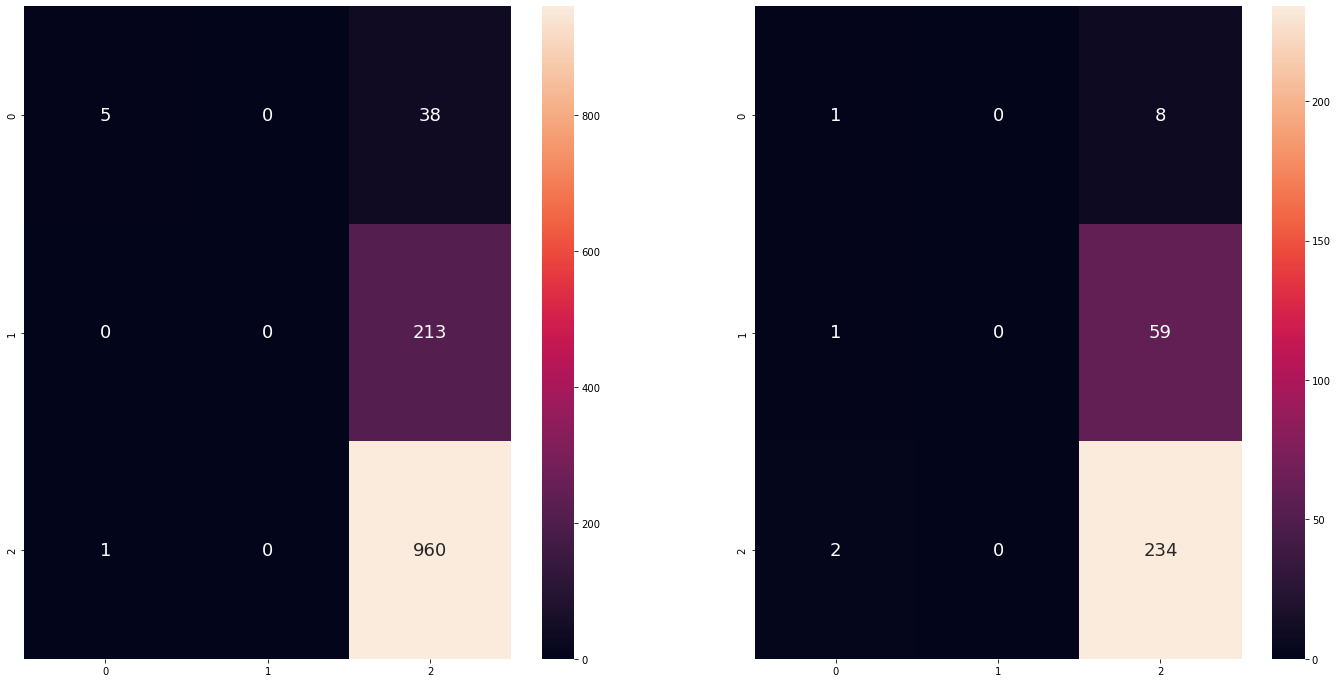

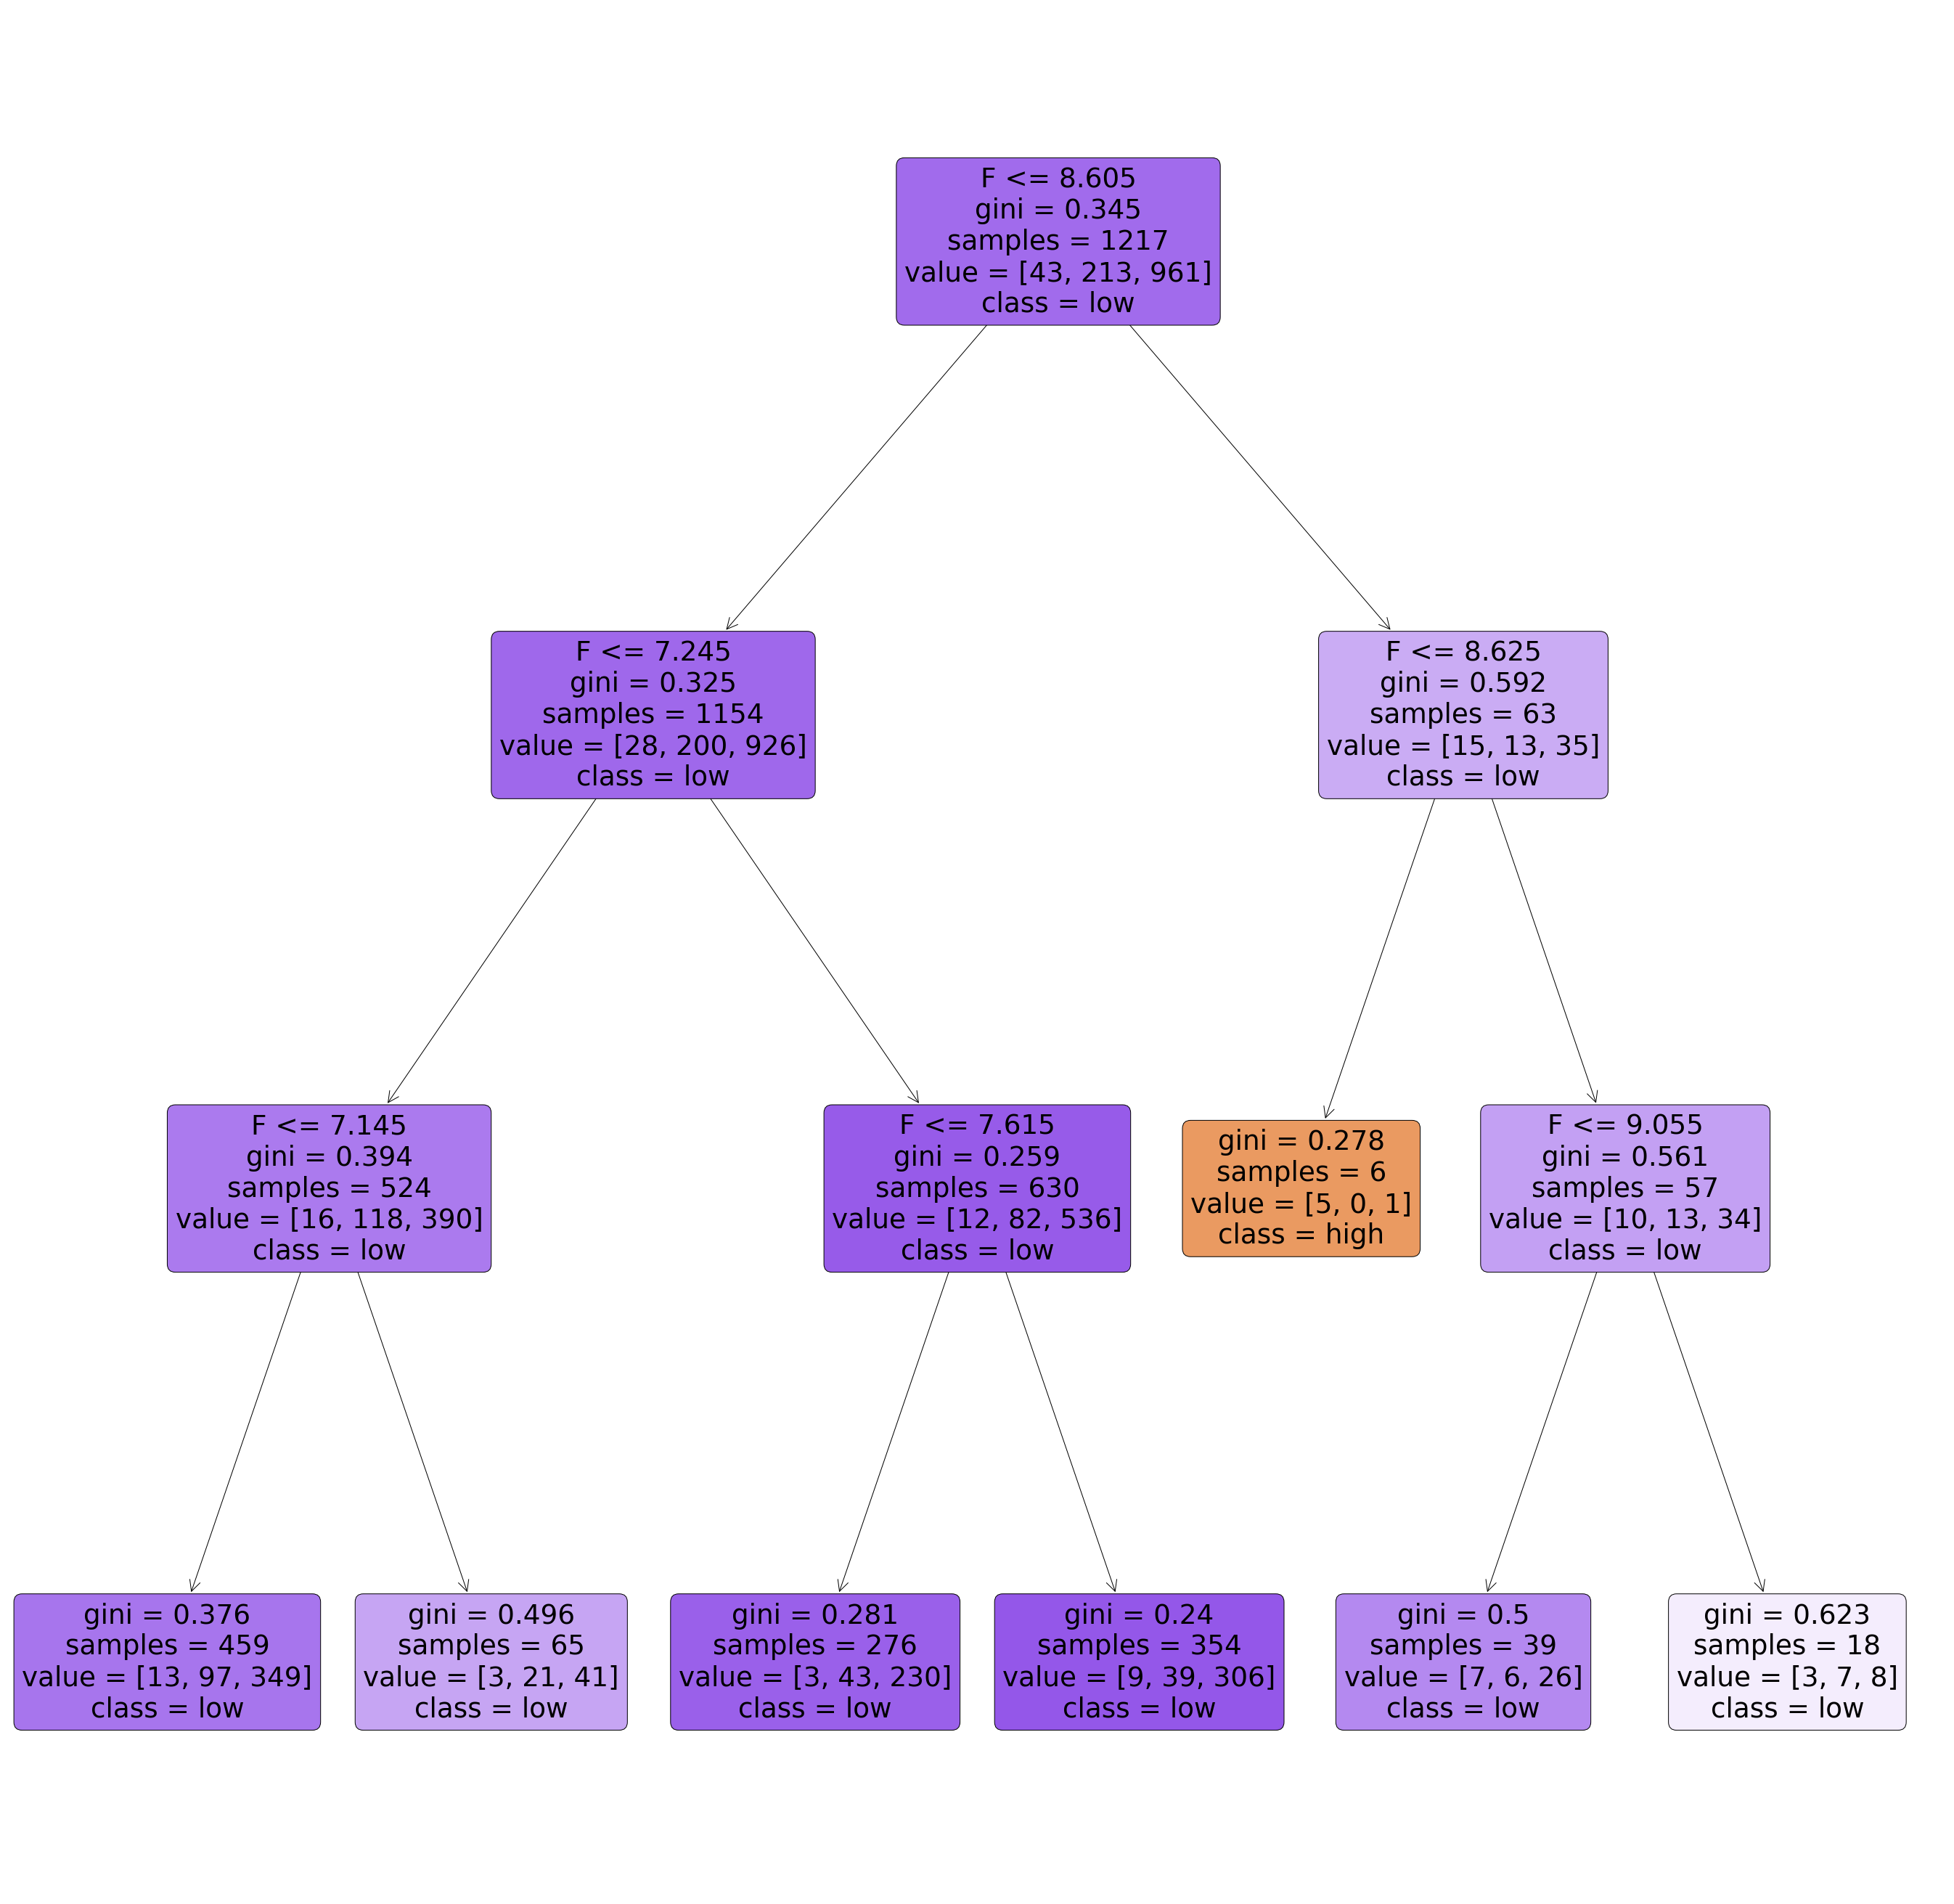

In [30]:
decTree(TV_data_manga["Score_reference"].to_numpy().reshape(-1,1),TV_data_manga["Manga_score"].to_numpy().reshape(-1,1),3)

POLY REGRESSION FAILS BC COOR IS TOO LOW

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X1 = TV_data_manga["genre_reference_1"].iloc[:3000].to_numpy().reshape(-1,1) #0.20 without
X2 = TV_data_manga["genre_reference_2"].iloc[:3000].to_numpy().reshape(-1,1) #0.18 without
X3 = TV_data_manga["Season"].iloc[:3000].to_numpy().reshape(-1,1) #0.25 without
X4 = TV_data_manga["Source_reference"].iloc[:3000].to_numpy().reshape(-1,1) ##0.12 without
X5 = TV_data_manga['Members'].iloc[:3000].to_numpy().reshape(-1,1) #0.32 without (deg9)
X6 = TV_data_manga['Episodes'].iloc[:3000].to_numpy().reshape(-1,1) #0.39 without, aka useless
X = np.concatenate((X1, X2, X3, X4, X5), axis=1) #0.39 with X1-5 deg2
y = TV_data_manga["Score"].iloc[:3000]

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)

r_sq = model.score(X_poly, y)
print('R^2 score:', r_sq)

R^2 score: 0.31399799803719897


HIGH/MID/LOW DECTREE HAS HIGH ACCURACY AS LOW MANGA SCORES -> LOW ANIME SCORES

C:\Users\Dreamcore\AppData\Local\Temp\ipykernel_8548\719134220.py:17: RuntimeWarning: invalid value encountered in longlong_scalars
  FP1 = cm1[0][1]/(cm1[0][1] + cm1[0][0])


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8019720624486442

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7540983606557377



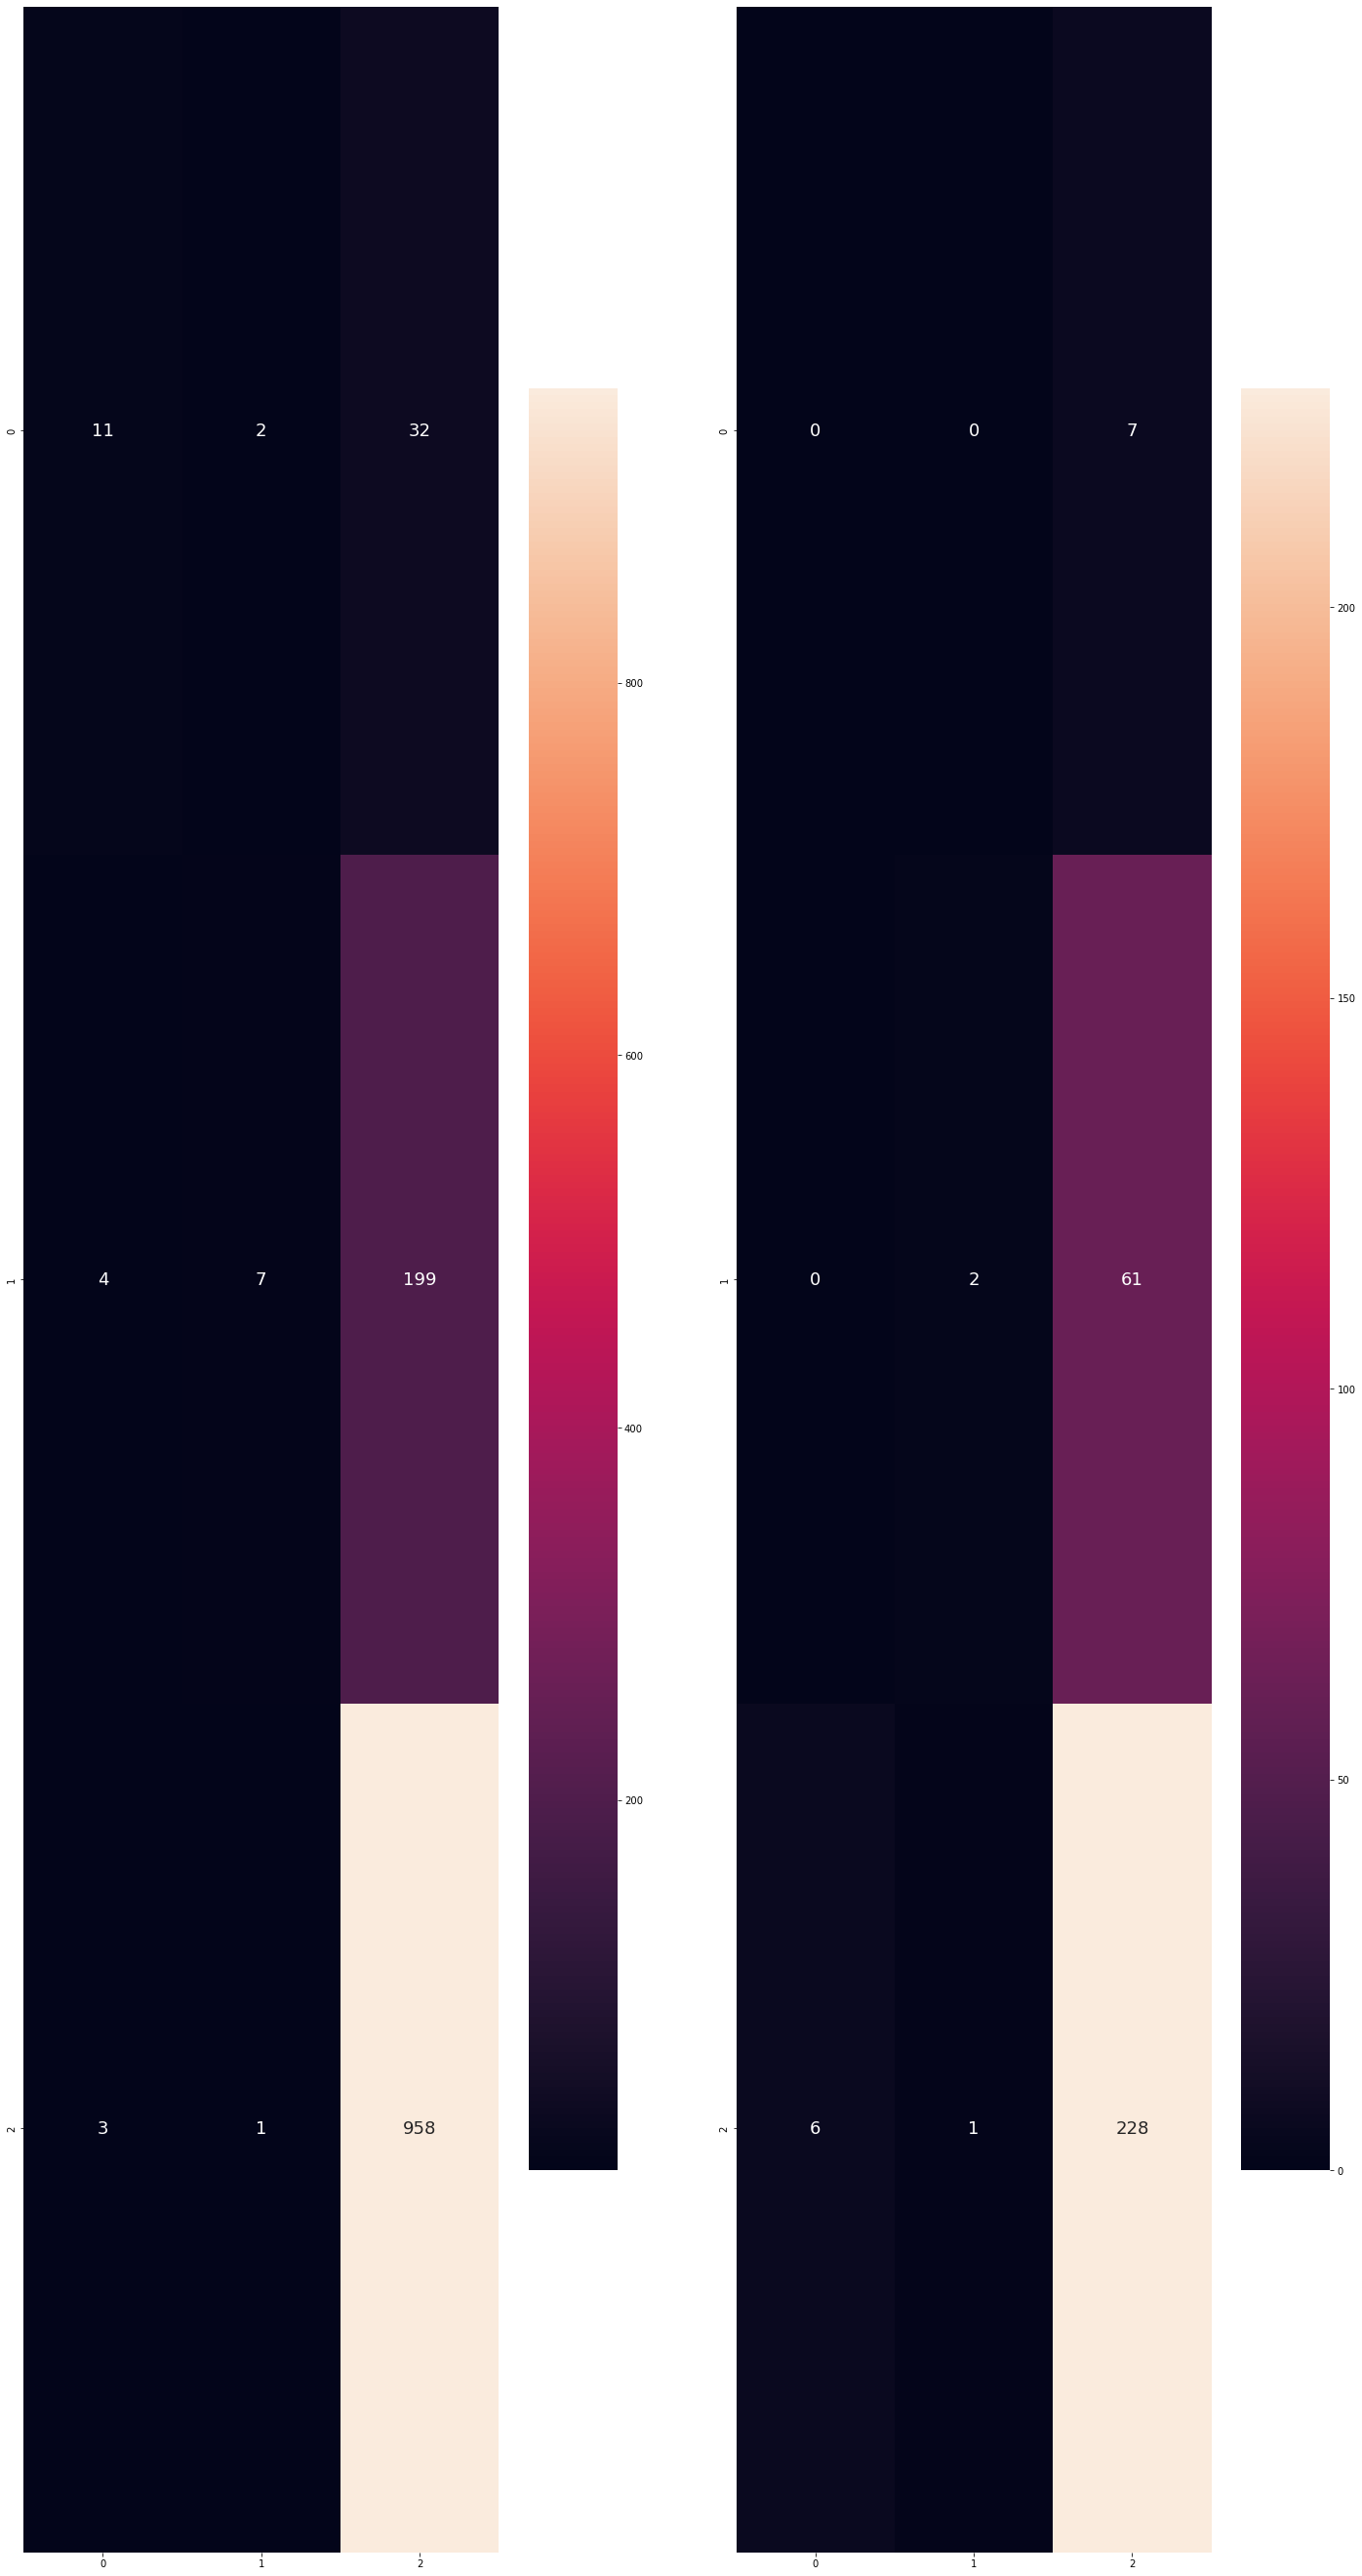

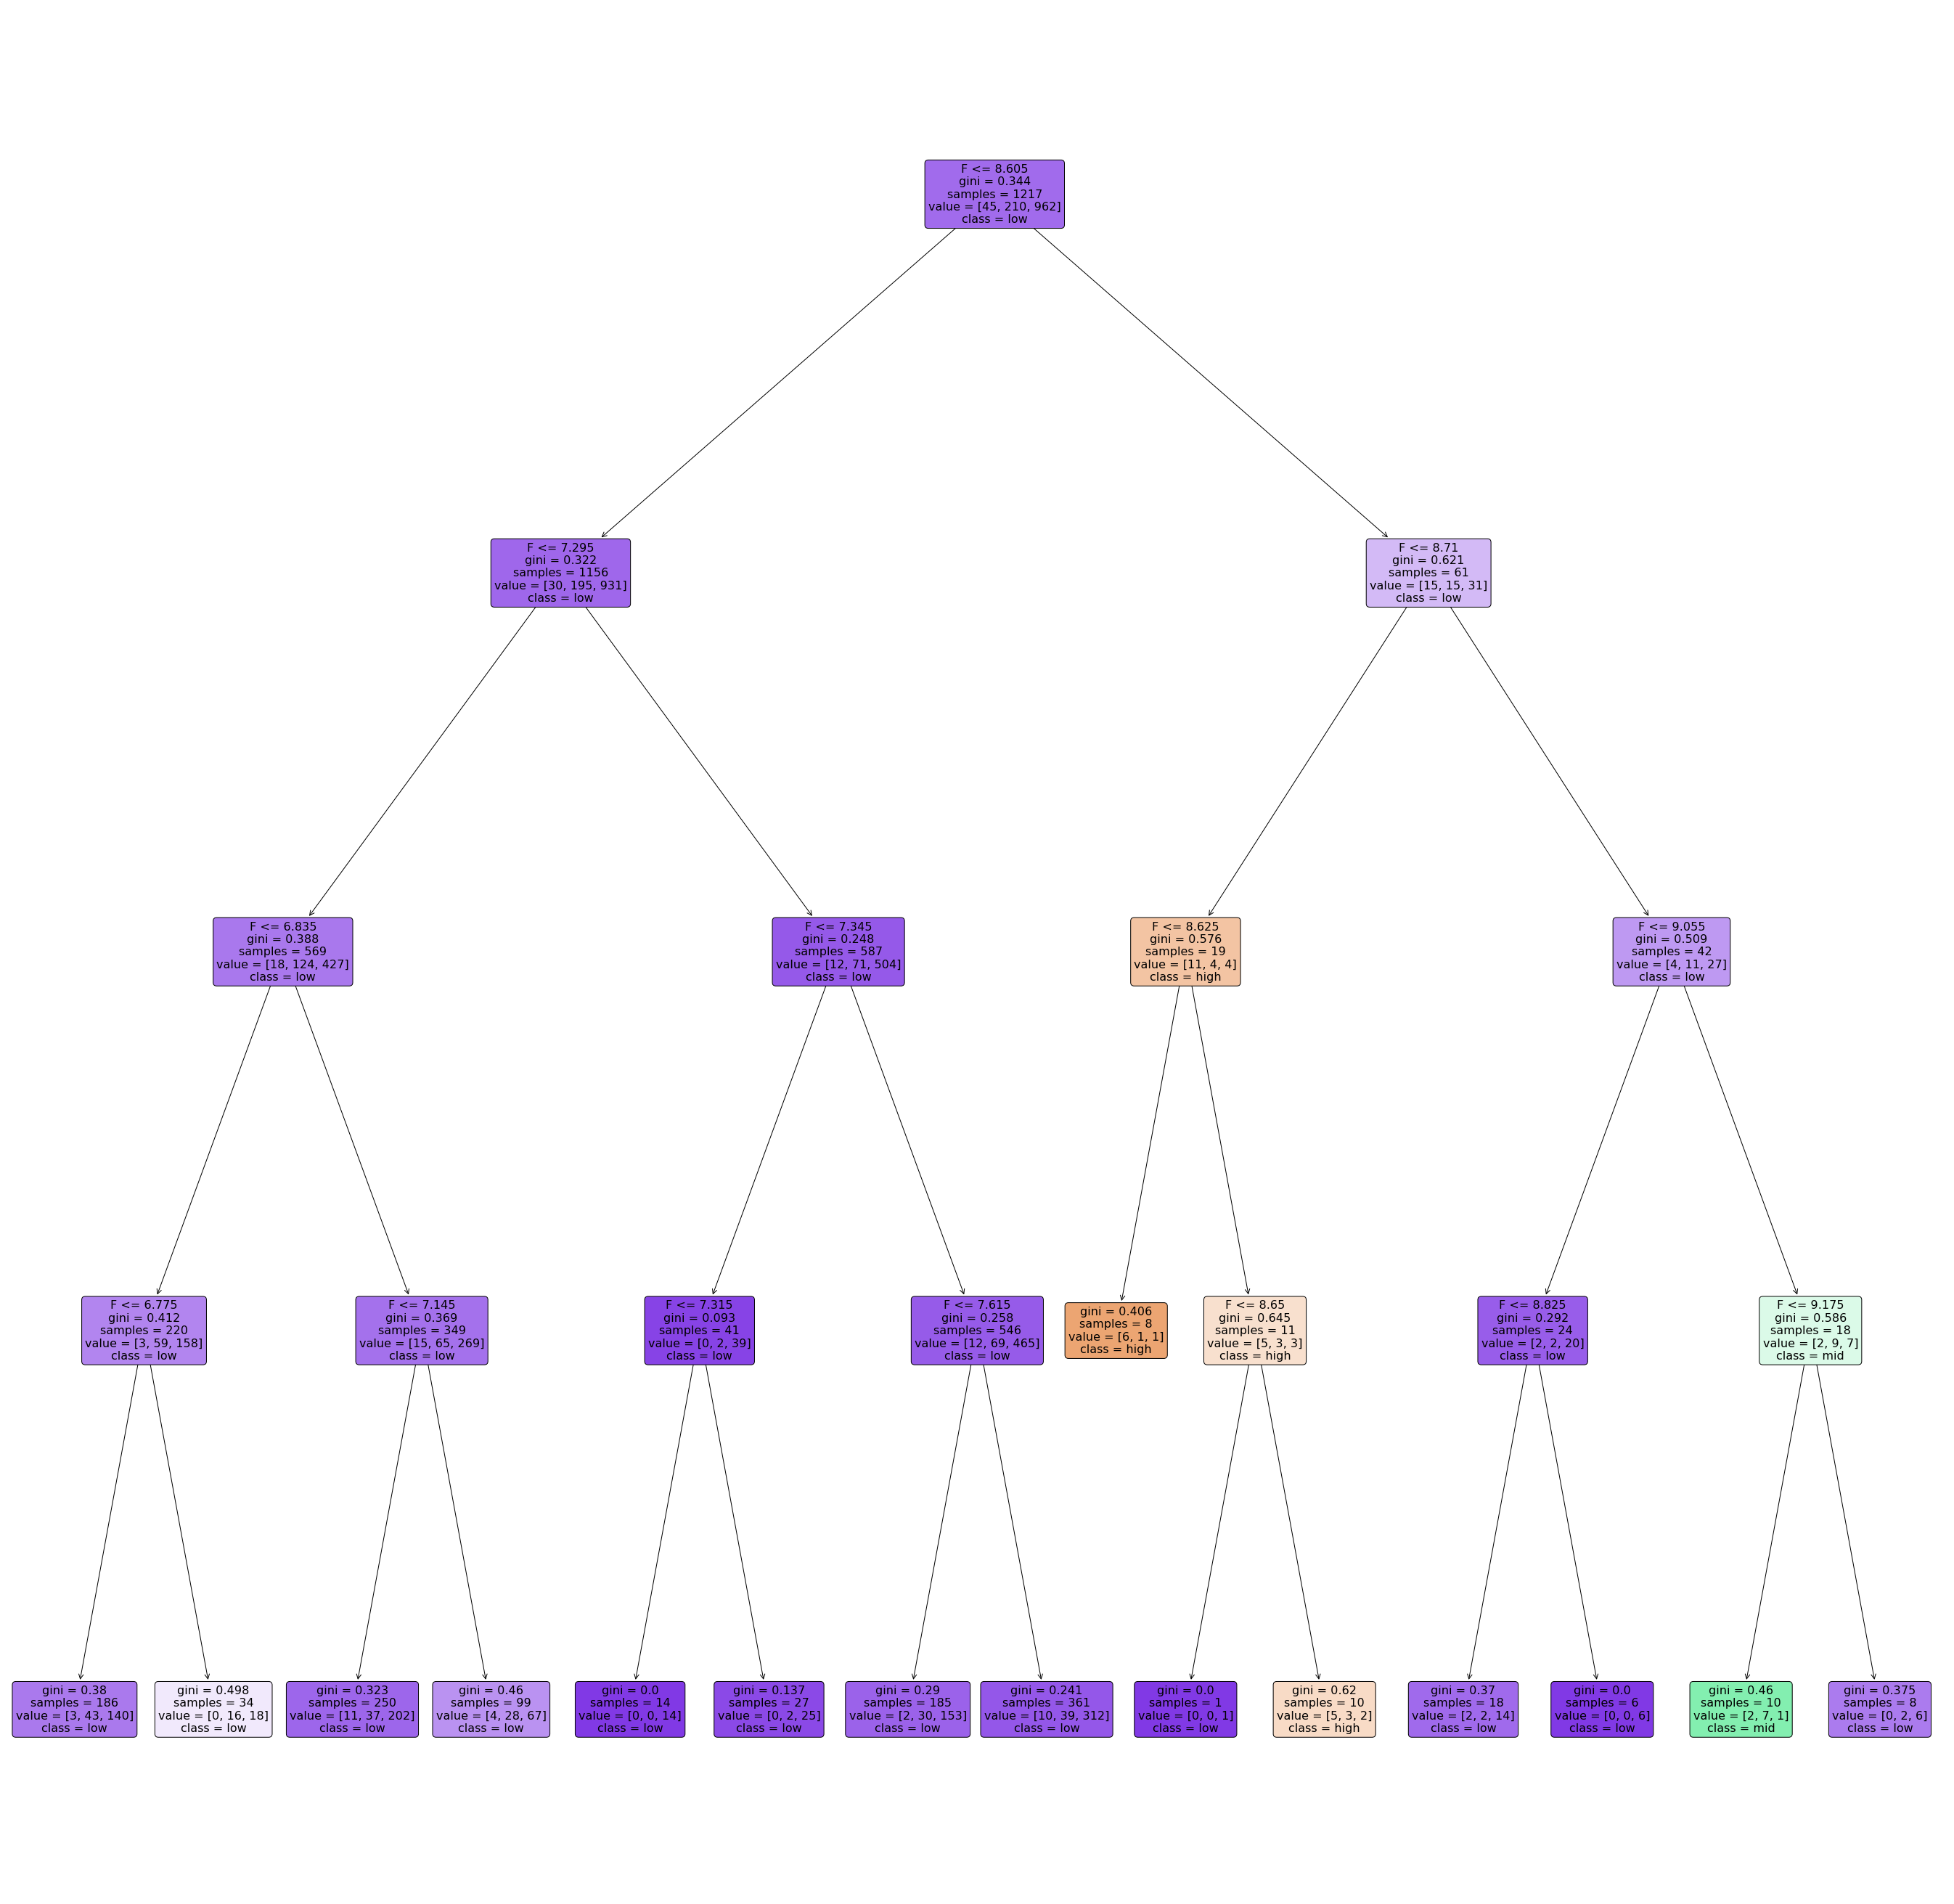

In [22]:
decTree(TV_data_manga["Score_reference"].to_numpy().reshape(-1,1),TV_data_manga["Manga_score"].to_numpy().reshape(-1,1),4)

DECIDE ON HAVING ISGOOD/ISNOTGOOD RATING INSTEAD

In [12]:
TV_data_manga.insert(loc = 2, column = "Score_reference2", value = "bad")
for i in range(len(TV_data_manga)):
    if TV_data_manga["Score"].iloc[i] >7.5:
        TV_data_manga["Score_reference2"].iloc[i] = "good"

C:\Users\Dreamcore\AppData\Local\Temp\ipykernel_21536\1090475024.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TV_data_manga["Score_reference2"].iloc[i] = "good"


In [13]:
TV_data_manga.insert(loc = 2, column = "Score_reference2_copy", value = 0)
for i in range(len(TV_data_manga)):
    if TV_data_manga["Score"].iloc[i] >7.5:
        TV_data_manga["Score_reference2_copy"].iloc[i] = 1

C:\Users\Dreamcore\AppData\Local\Temp\ipykernel_21536\2912896860.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TV_data_manga["Score_reference2_copy"].iloc[i] = 1


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6852917009038619

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6754098360655738



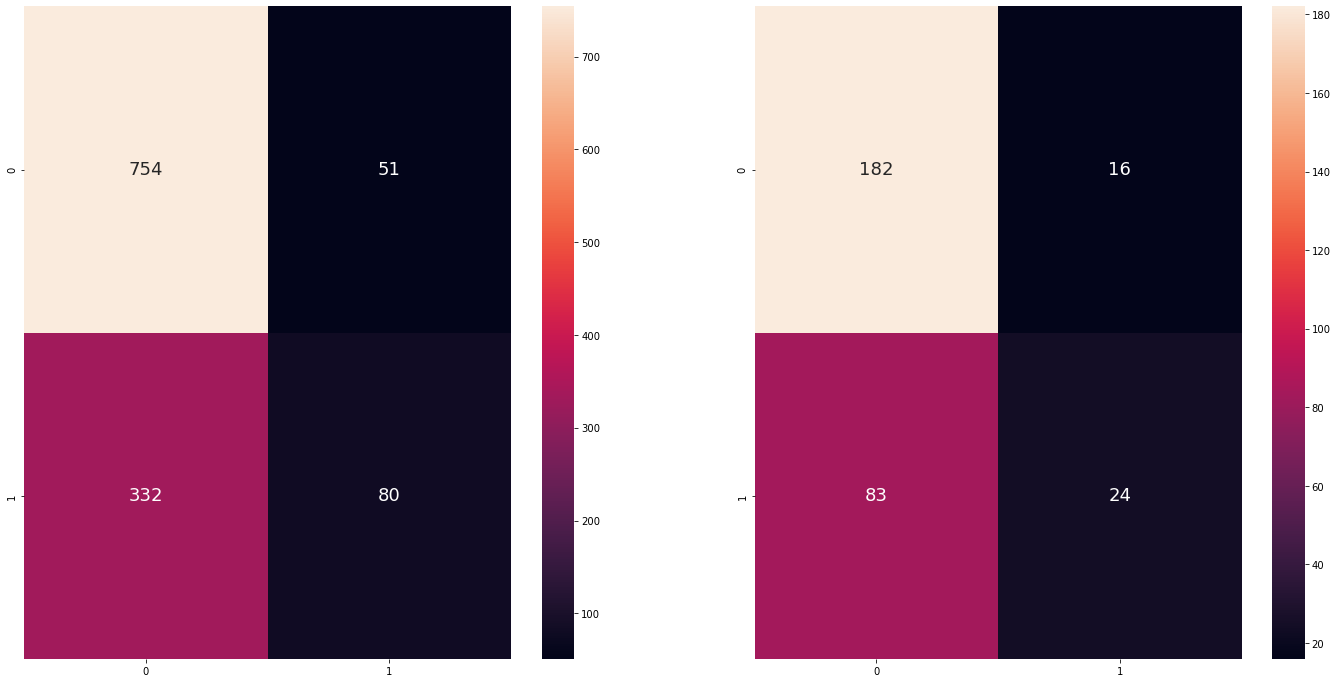

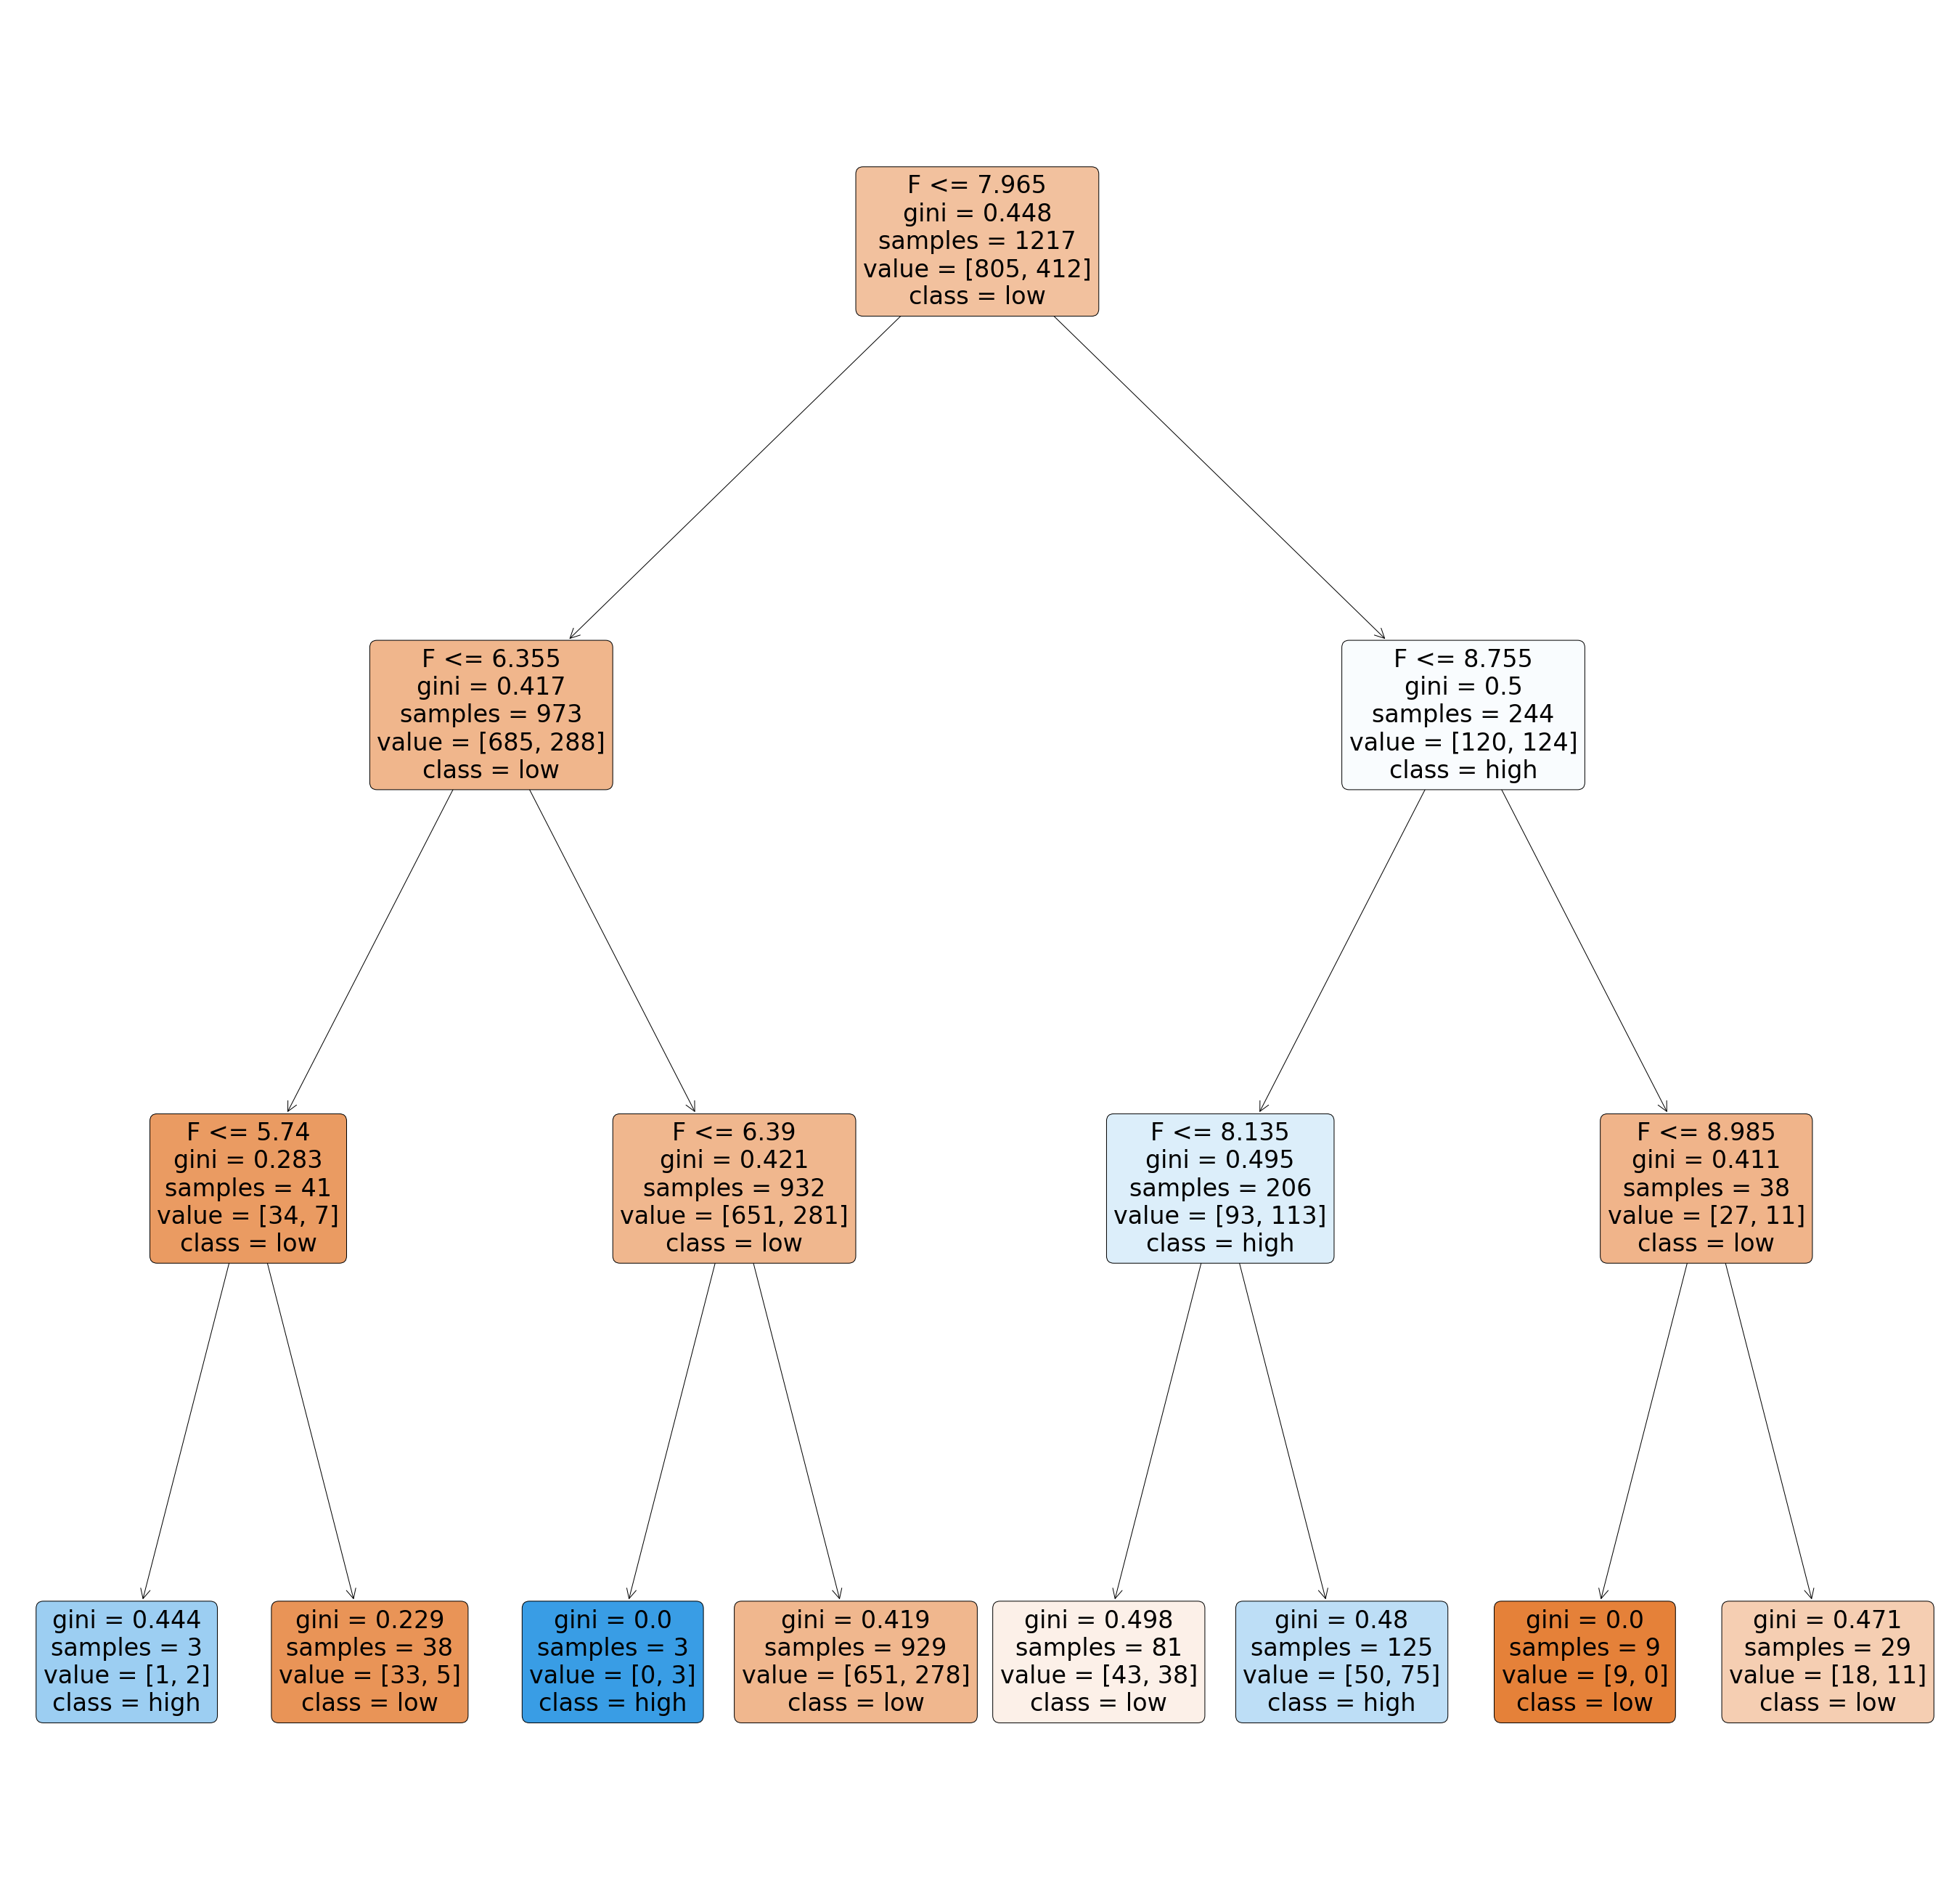

In [57]:
decTree(TV_data_manga["Score_reference2"].to_numpy().reshape(-1,1),TV_data_manga["Manga_score"].to_numpy().reshape(-1,1),3)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7871815940838126

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7901639344262295



C:\Users\Dreamcore\AppData\Local\Temp\ipykernel_21536\2852774678.py:13: RuntimeWarning: invalid value encountered in longlong_scalars
  TP = cm[1][1]/(cm[1][1] + cm[1][0])


IndexError: list index out of range

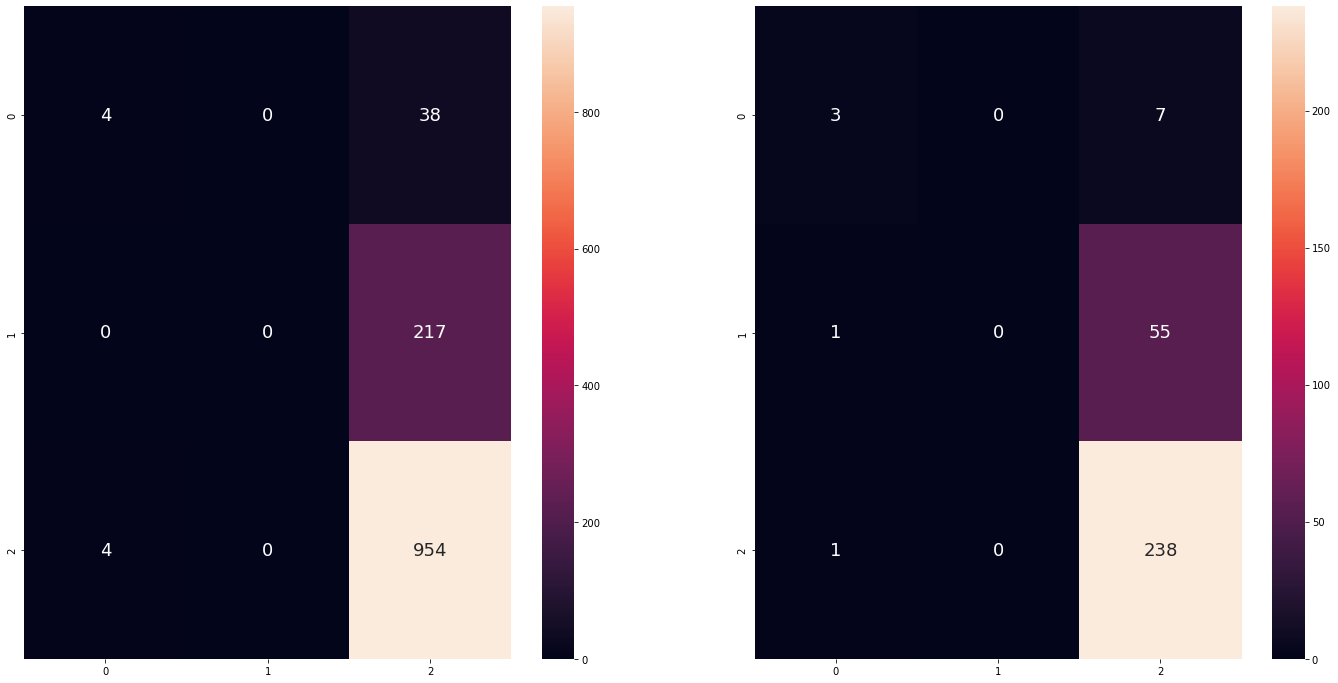

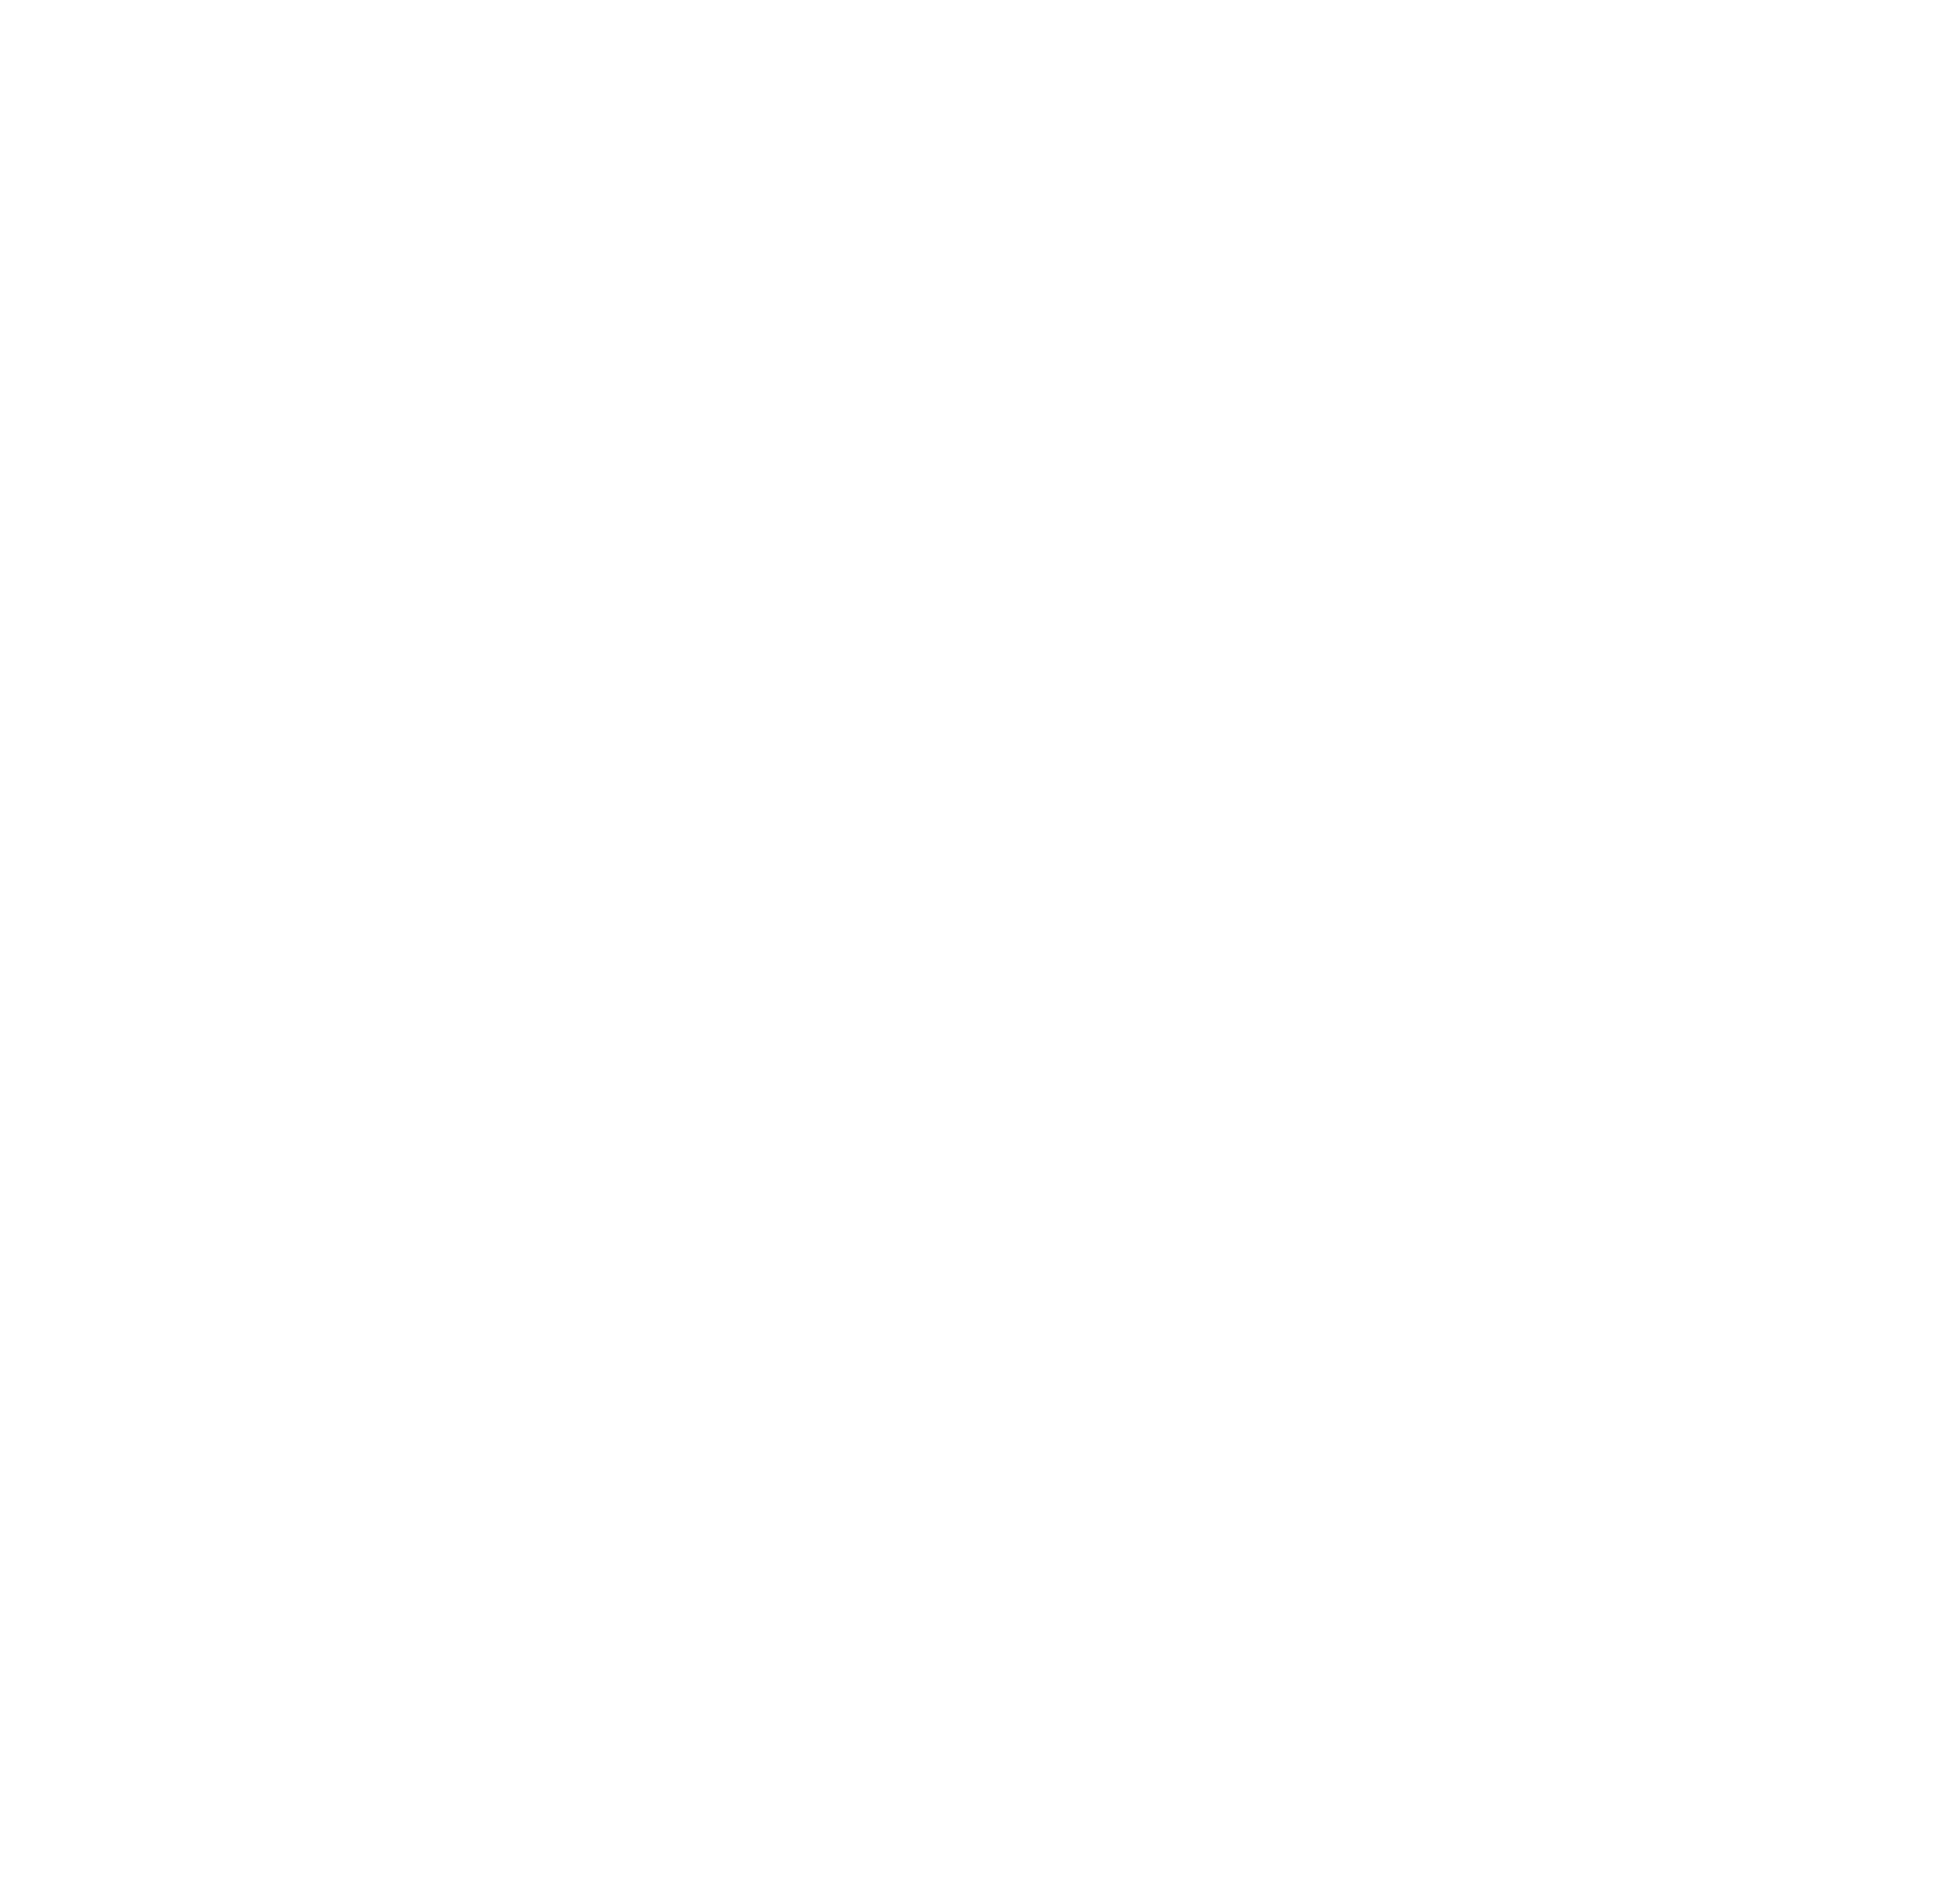

In [43]:
decTree(TV_data_manga["Score_reference"].to_numpy().reshape(-1,1),TV_data_manga["Manga_score"].to_numpy().reshape(-1,1),3)

In [23]:
def decTree2(y, x1, x2, depth):
    x = pd.concat([x1, x2], axis=1)
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2)    
    dectree = DecisionTreeClassifier(max_depth = depth)
    dectree.fit(X_train, Y_train)
    Y_train_pred = dectree.predict(X_train)
    Y_test_pred = dectree.predict(X_test)
    cm = confusion_matrix(Y_train, Y_train_pred)
    TP = cm[1][1]/(cm[1][1] + cm[1][0])
    FP = cm[0][1]/(cm[0][1] + cm[0][0])
    cm1 = confusion_matrix(Y_test, Y_test_pred)
    TP1 = cm1[1][1]/(cm1[1][1] + cm1[1][0])
    FP1 = cm1[0][1]/(cm1[0][1] + cm1[0][0])

    print("Goodness of Fit of Model \tTrain Dataset")
    print("Classification Accuracy \t:", dectree.score(X_train, Y_train))
    #print("True Positive Rate \t:", TP)
    #print("False Positive Rate\t:", FP)
    print()
    print("Goodness of Fit of Model \tTest Dataset")
    print("Classification Accuracy \t:", dectree.score(X_test, Y_test))
    #print("True Positive Rate \t:", TP1)
    #print("False Positive Rate\t:", FP1)
    print()
    f, axes = plt.subplots(1, 2, figsize=(24, 48))
    sb.heatmap(confusion_matrix(Y_train, Y_train_pred),
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
    sb.heatmap(confusion_matrix(Y_test, Y_test_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
    f = plt.figure(figsize=(48,48))
    plot_tree(dectree, filled=True, rounded=True, 
              feature_names="Fav%", 
              class_names=['Null',
 'Action',
 'Military',
 'Adventure',
 'Comedy',
 'Drama',
 'Magic',
 'Fantasy',
 'Shounen',
 'Thriller',
 'Sci-Fi',
 'Historical',
 'Parody',
 'Samurai',
 'Super Power',
 'Mystery',
 'Game',
 'Seinen',
 'Slice of Life',
 'Supernatural',
 'Romance',
 'Vampire',
 'Mecha',
 'Sports',
 'School',
 'Space',
 'Psychological',
 'Josei',
 'Music',
 'Horror',
 'Police',
 'Demons',
 'Shoujo',
 'Martial Arts',
 'Shounen Ai',
 'Ecchi',
 'Kids',
 'Shoujo Ai',
 'Dementia',
 'Harem',
 'Cars'])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.676253081347576

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6819672131147541



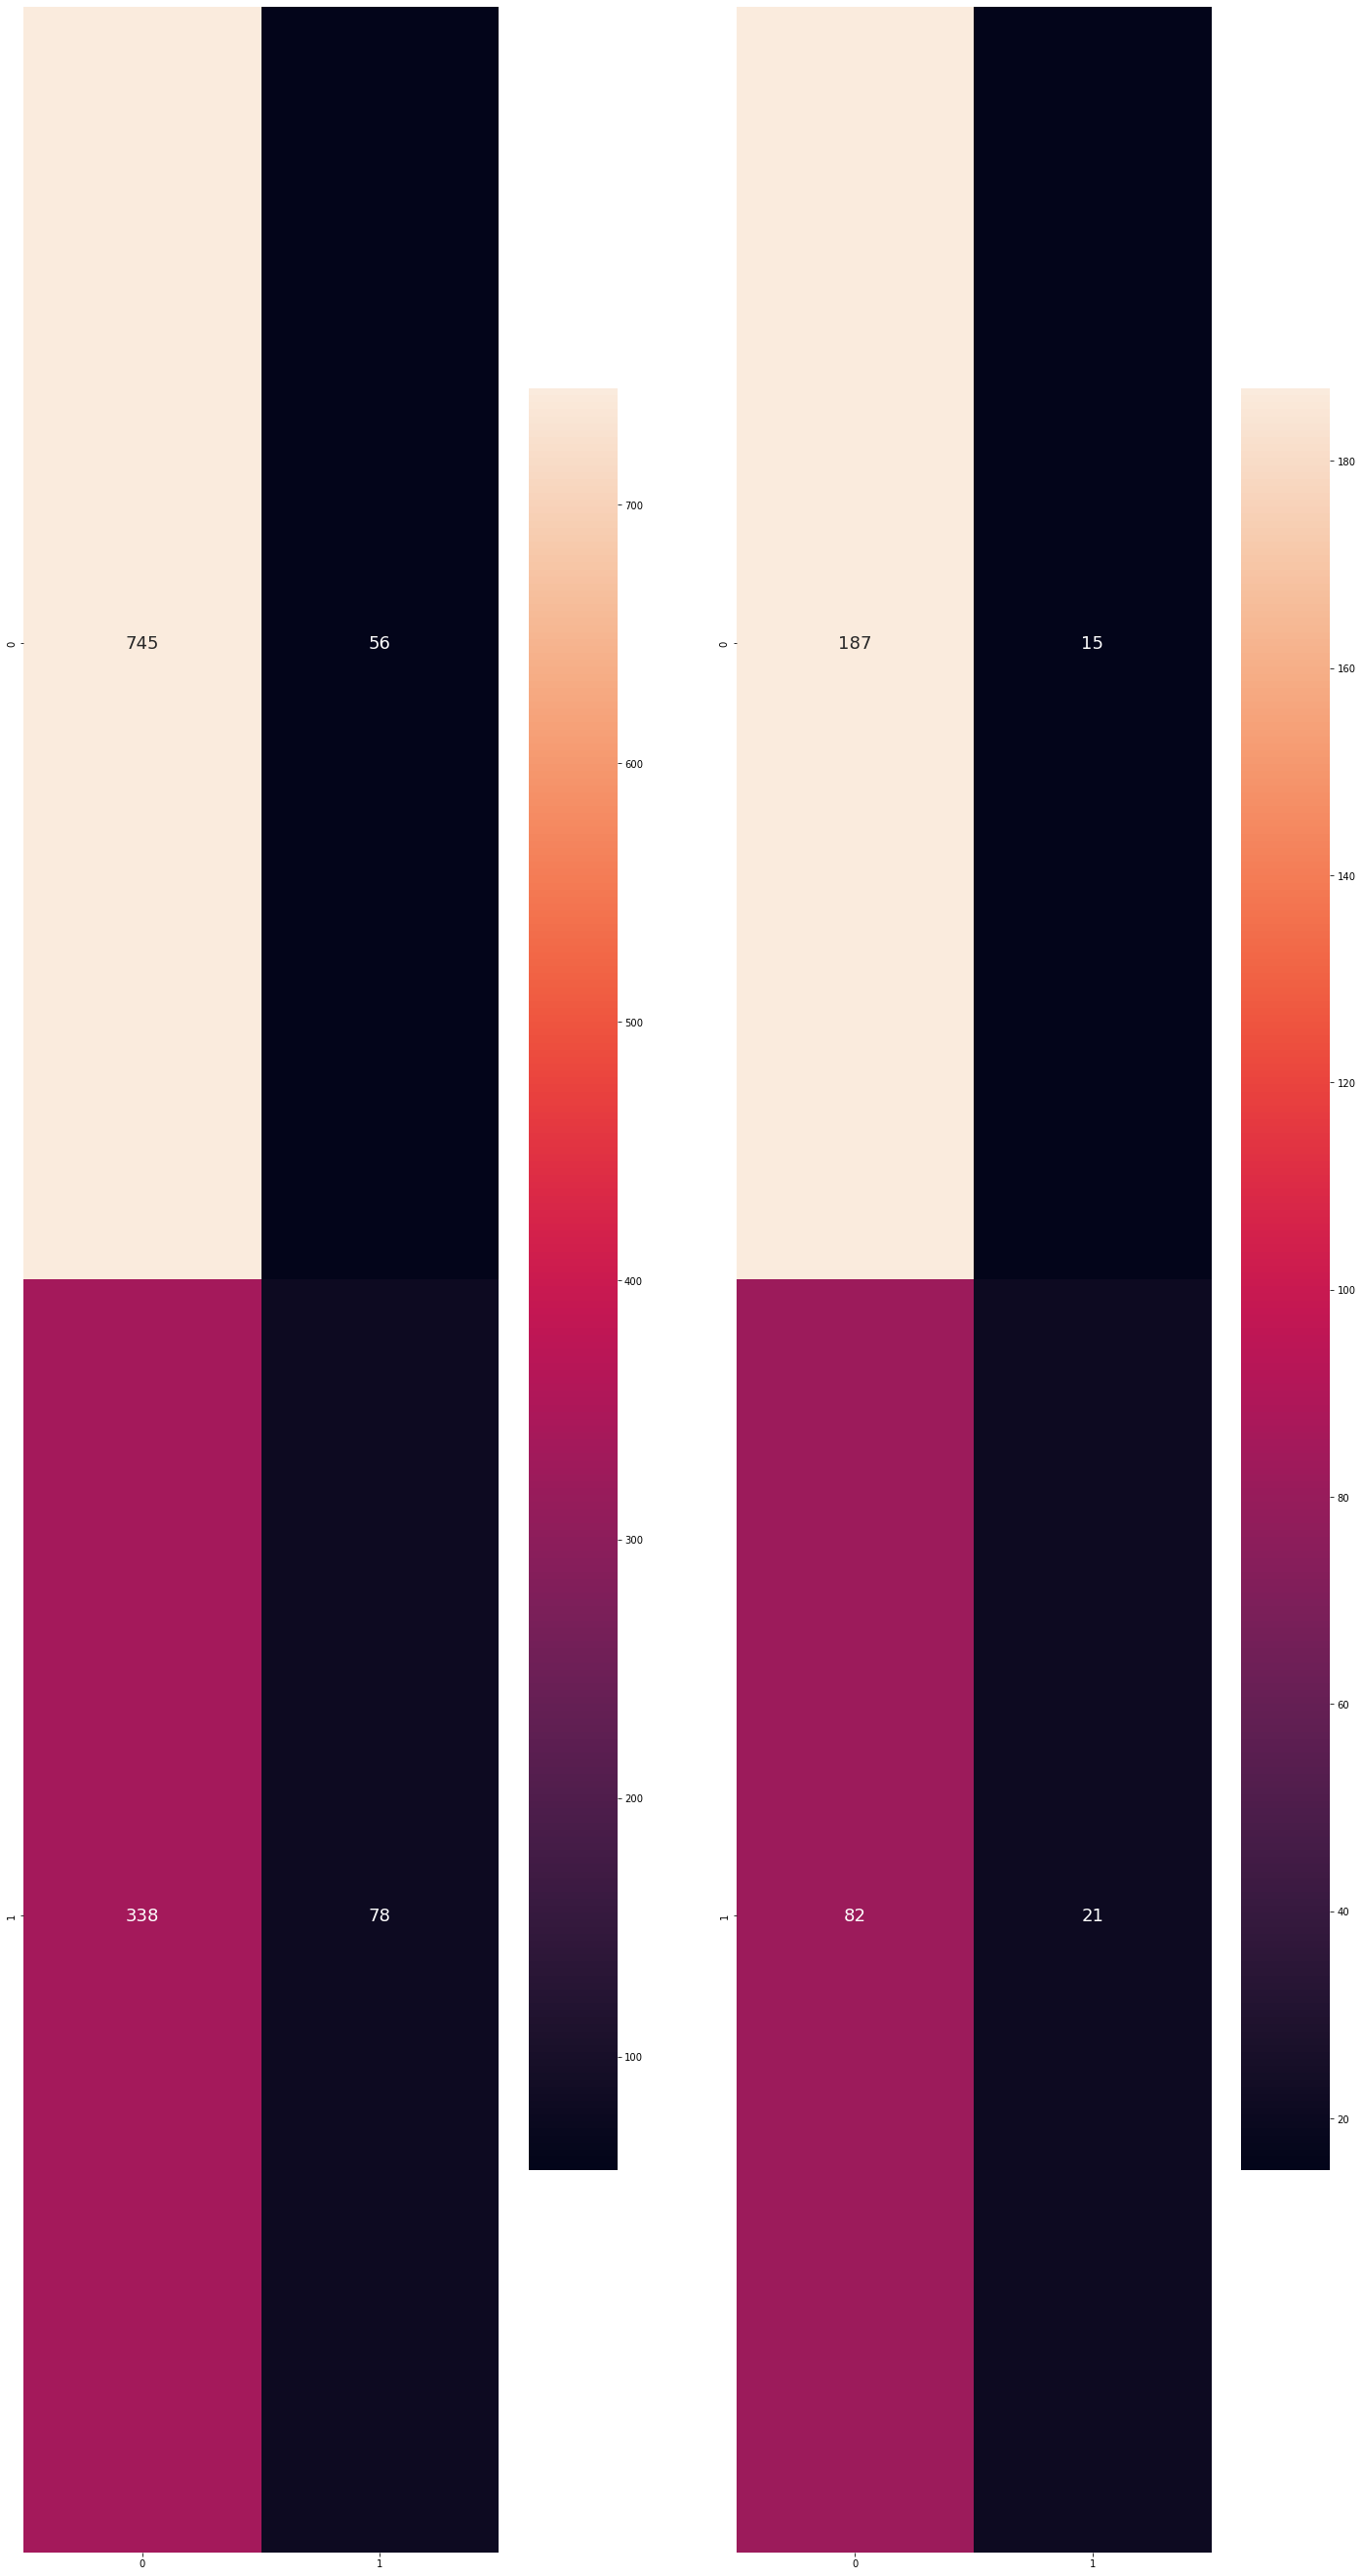

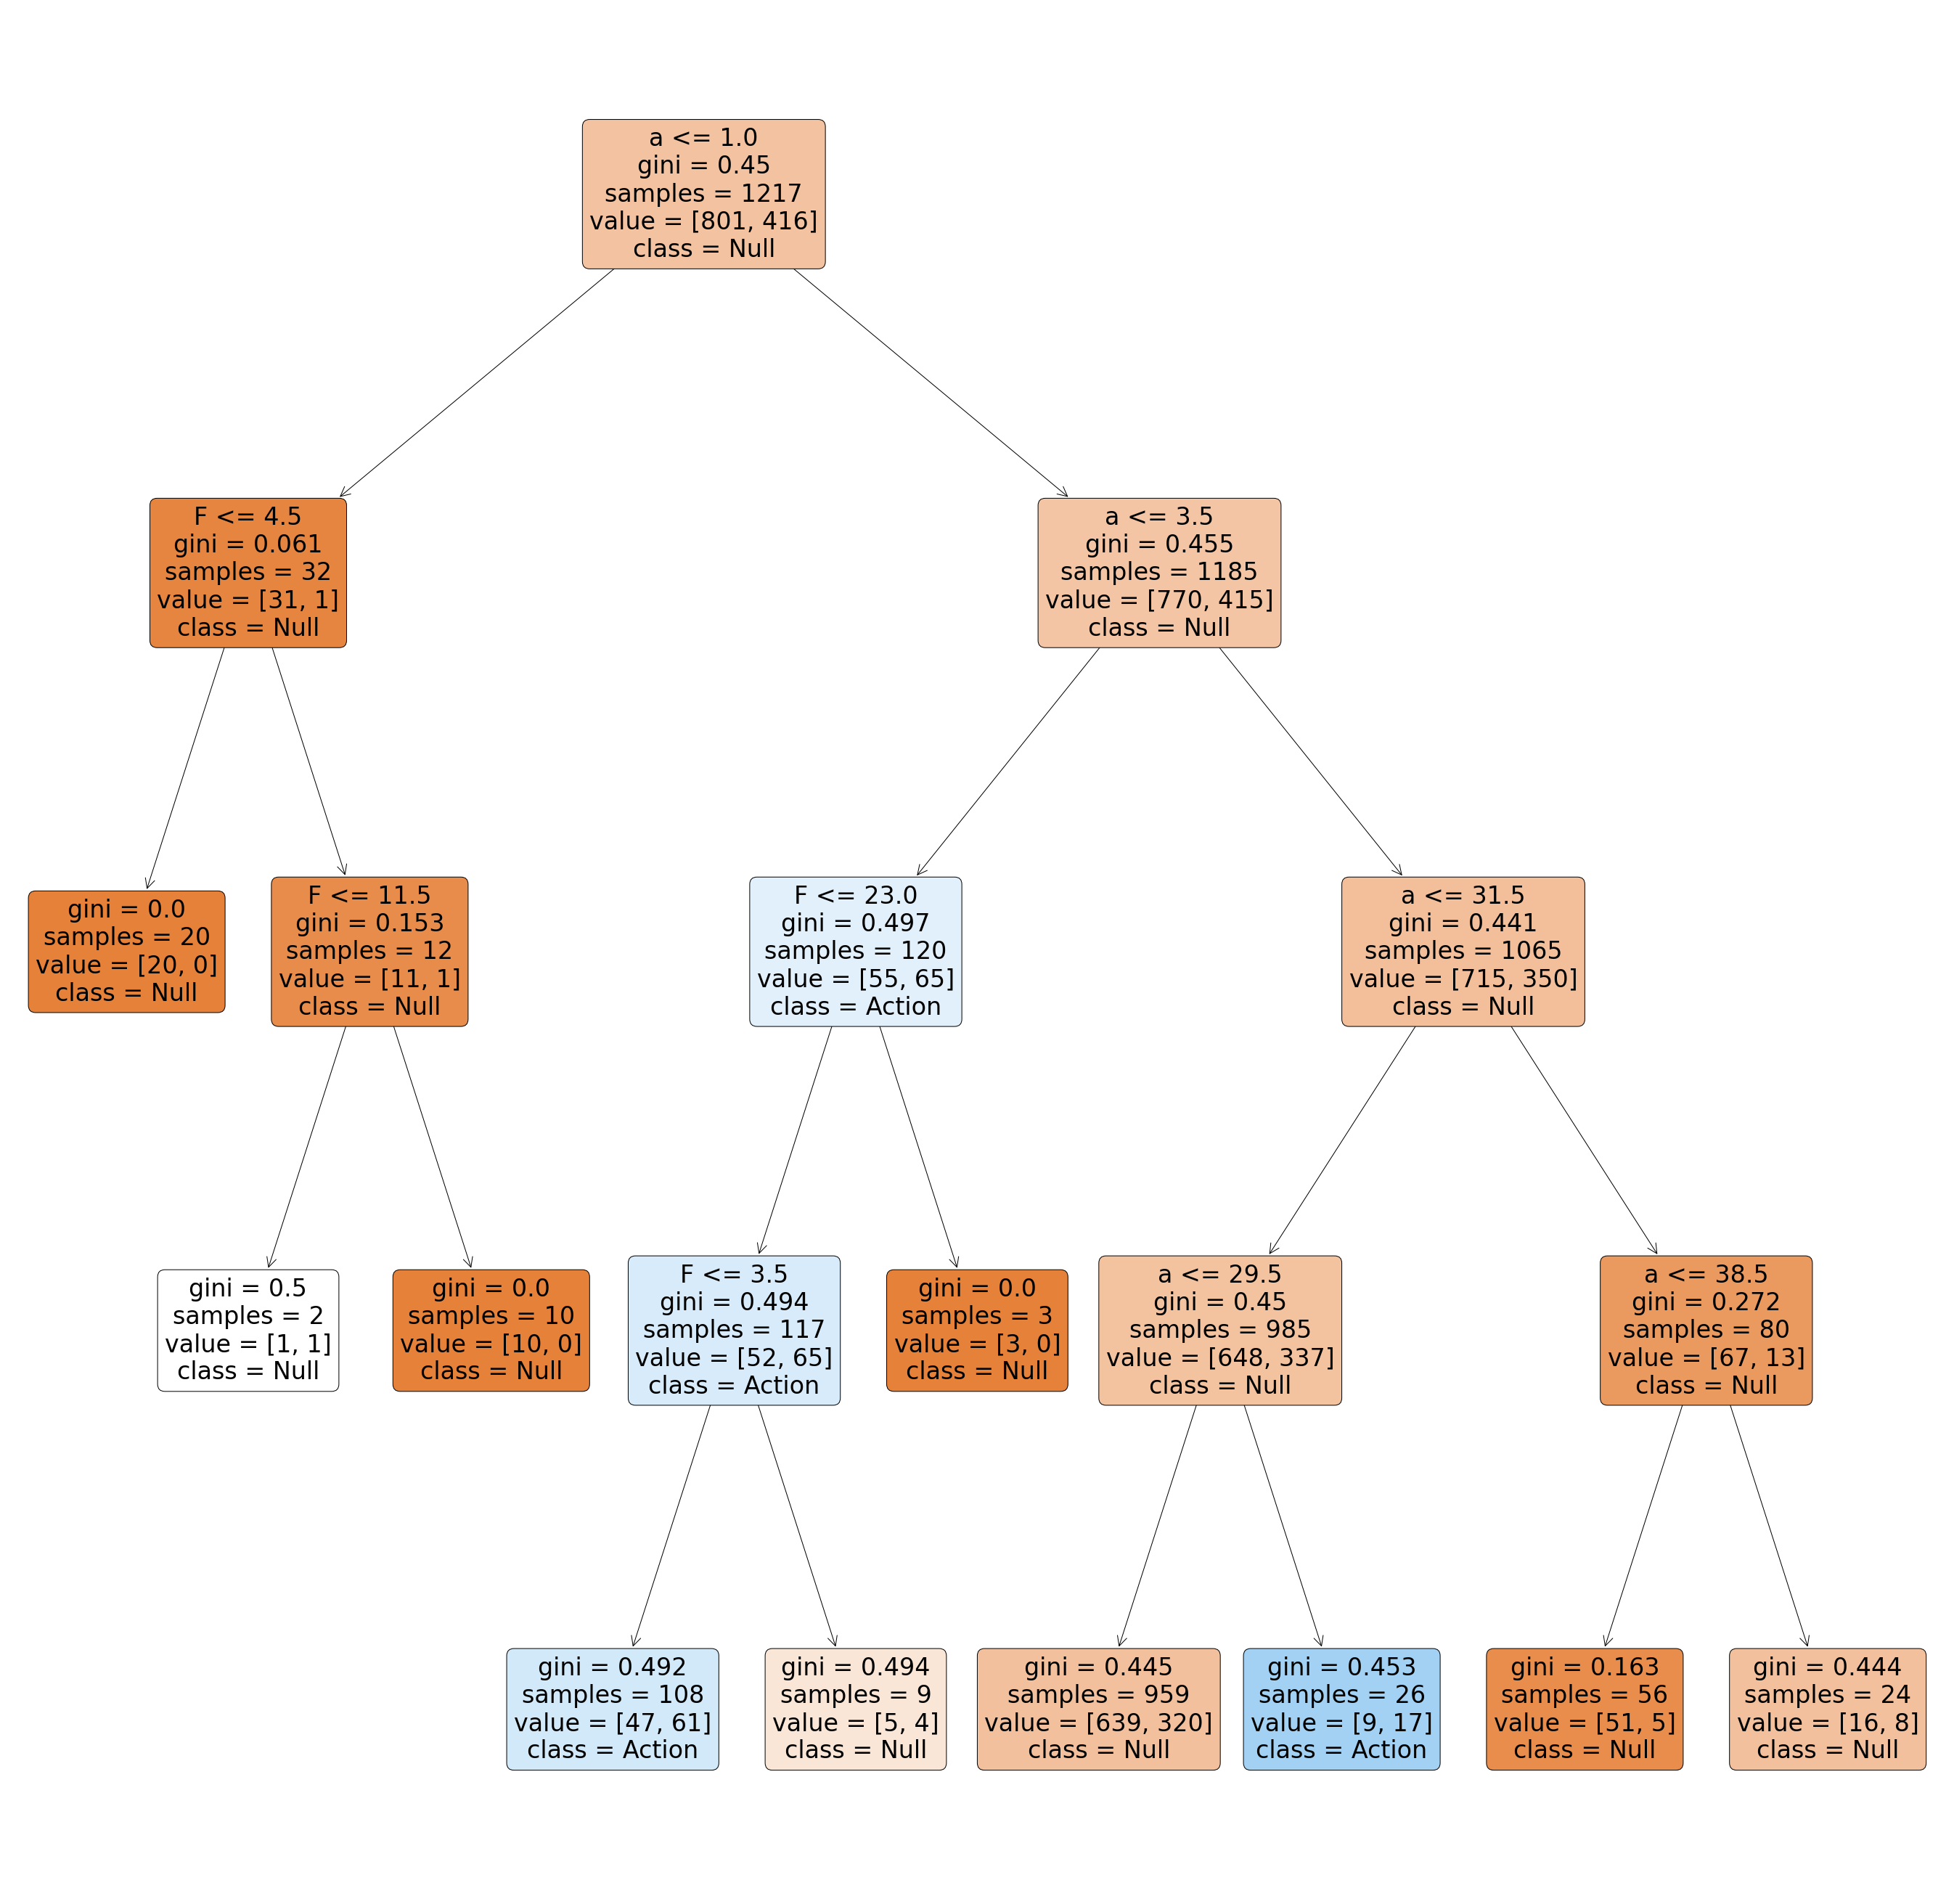

In [24]:
decTree2(TV_data_manga["Score_reference2"].to_numpy().reshape(-1,1),TV_data_manga["genre_reference_1"],
        TV_data_manga["genre_reference_2"],4)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8200493015612161

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8



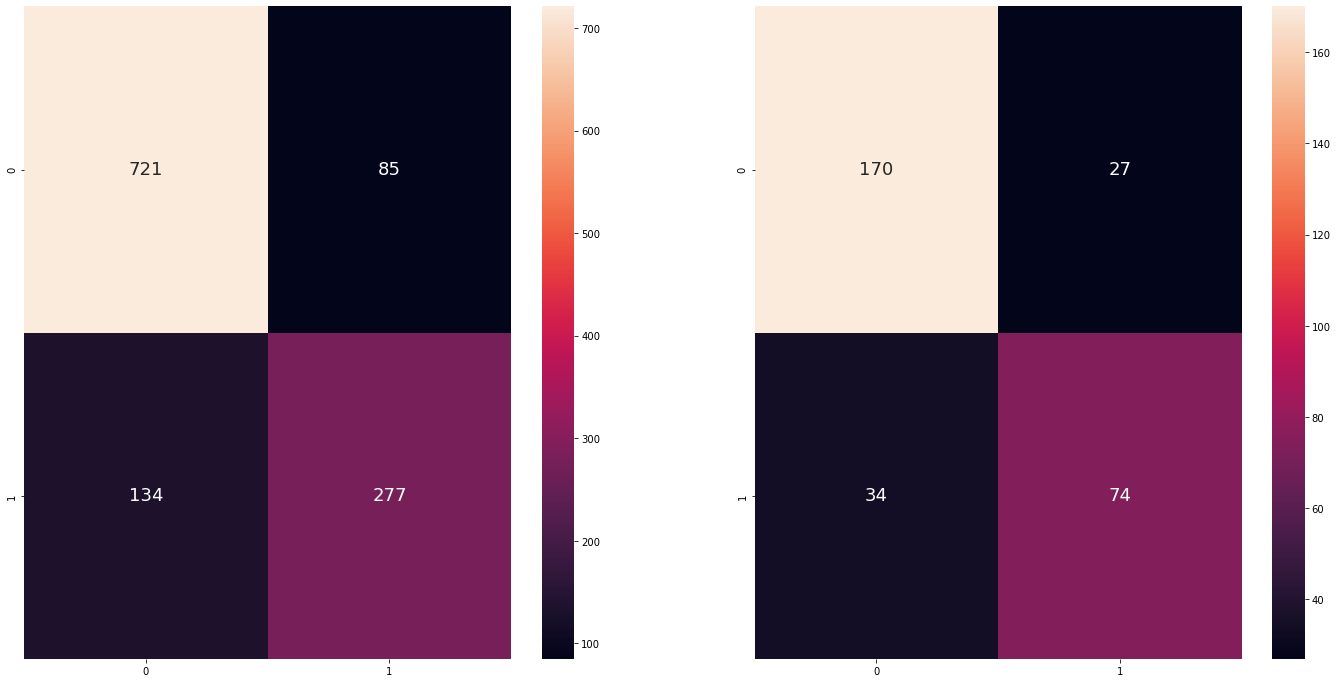

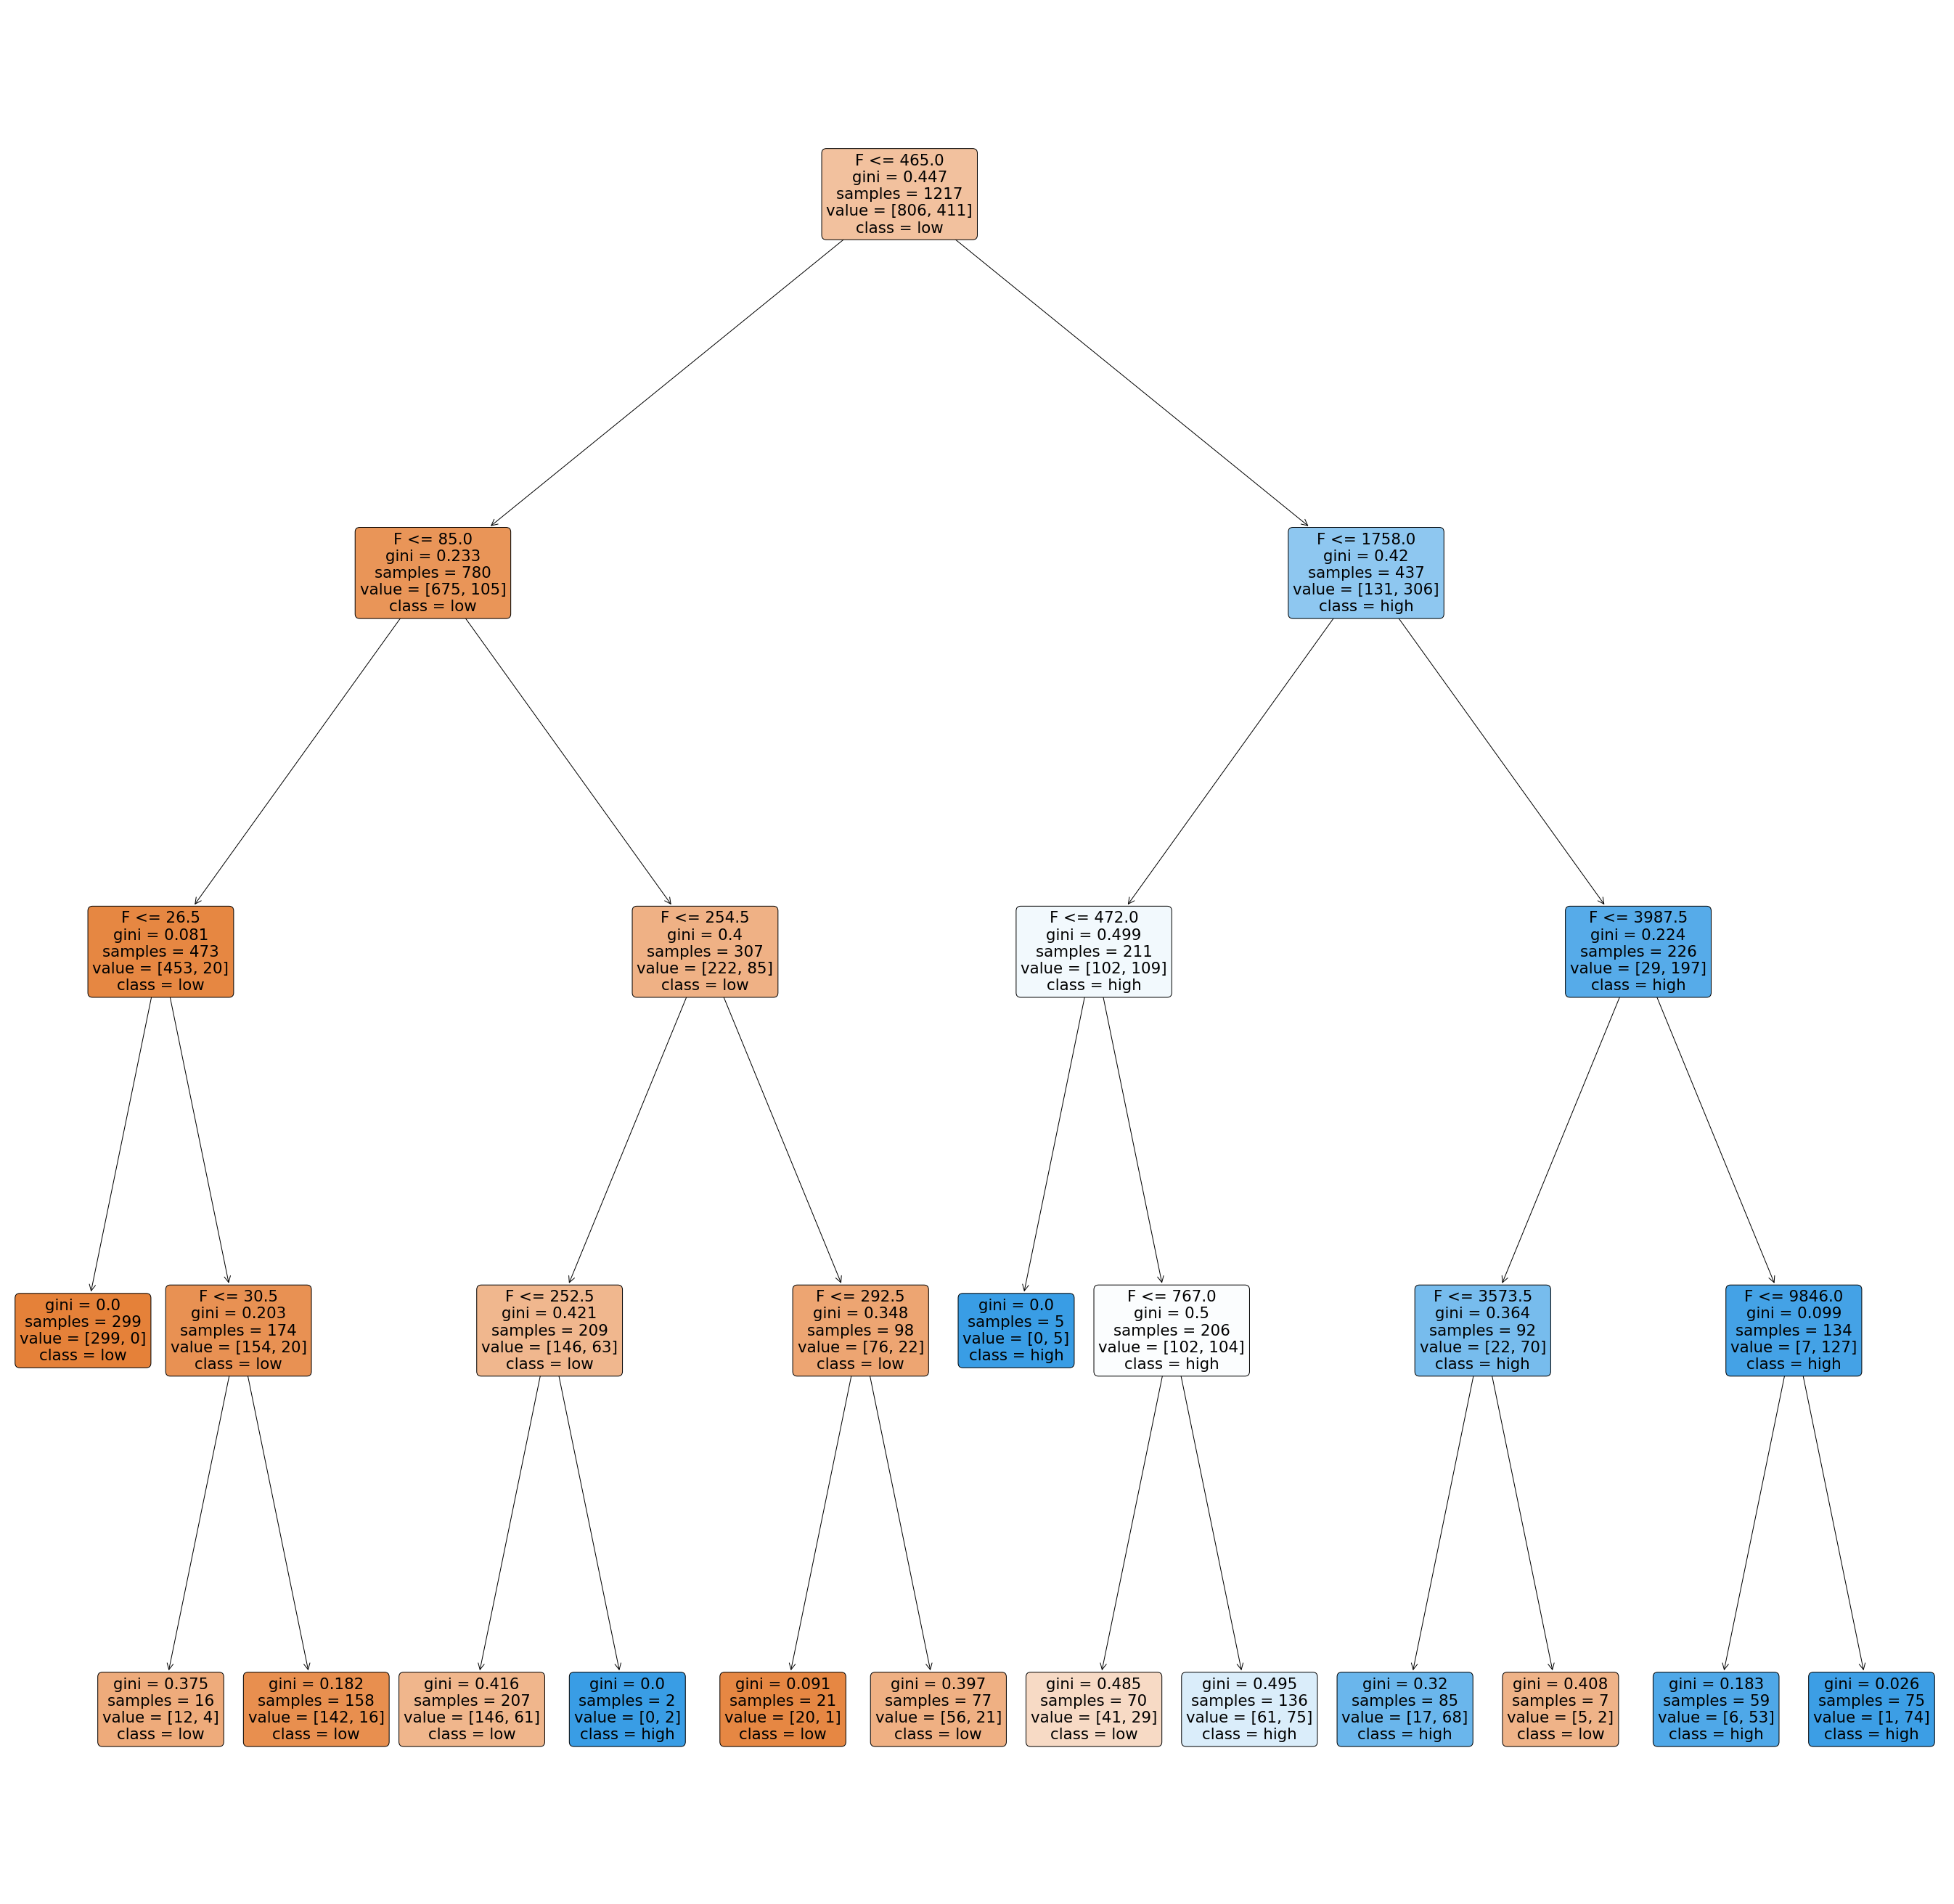

In [60]:
decTree(TV_data_manga["Score_reference2"].to_numpy().reshape(-1,1),TV_data_manga["Favorites"].to_numpy().reshape(-1,1),4)

In [128]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
from pprint import pprint

scores_list = []
def crossV(y, X, depth):  
    dectree = DecisionTreeClassifier(max_depth = depth)
    scores = cross_val_score(dectree, X, y, cv=5)
    scores_list.append(np.mean(scores))
    print("Depth of", depth)
    print(np.mean(scores))

Depth of 1
0.6504551337359793
Depth of 2
0.6622778257118205
Depth of 3
0.666876617773943
Depth of 4
0.6583369283865401
Depth of 5
0.6668960310612597
Depth of 6
0.6570513373597929
Depth of 7
0.6655867126833477
Depth of 8
0.6622929249352889
Depth of 9
0.651786022433132
Depth of 10
0.6531039689387403
Depth of 11
0.6478343399482311
Depth of 12
0.6465336496980155
Depth of 13
0.6445578084555652
Depth of 14
0.6445599654874893


<AxesSubplot:xlabel='depth', ylabel='score'>

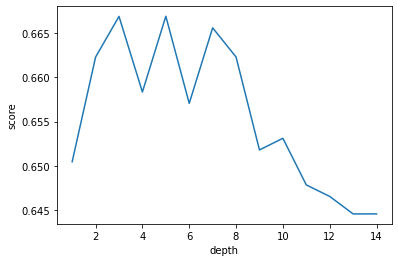

In [129]:
for i in range(1,15):
    crossV(TV_data_manga["Score_reference2"].to_numpy().reshape(-1,1),TV_data_manga["Manga_score"].to_numpy().reshape(-1,1), i)
depth = []
for i in range(1,15):
    depth.append(i)

d = {'score': scores_list, 'depth': depth}
d_pd = pd.DataFrame(d)
sb.lineplot(x='depth', y='score', data=d_pd)

In [168]:
Aired = TV_data_manga["Aired"]
Aired.iloc[824][0:4]

'1999'

In [172]:
a = []
for i in range(0,1522):
    if i==824:
        year = int(Aired.iloc[824][0:4])
    else:
        year = int(Aired.iloc[i].split(",")[1].strip()[0:4])
    age = 2020 - year
    a.append(age)
TV_data_manga["Age"] = a

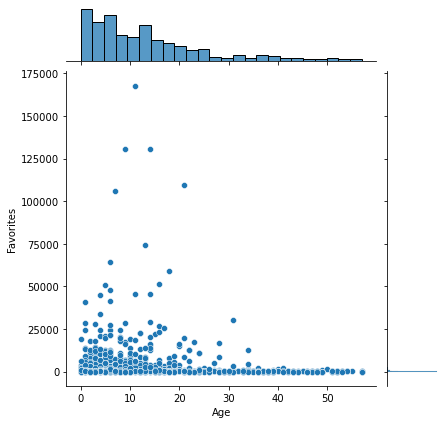

In [175]:
sb.jointplot(x = "Age", y = "Favorites", data = TV_data_manga)